# Libraries required

In [432]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
print("libraries imported!")

libraries imported!


# Reading the data

In [433]:
data_tr = pd.read_csv("train.csv")
data_te = pd.read_csv("test.csv")
print("Data loaded!")

Data loaded!


# putting train and test data together one above another

In [434]:
data = pd.concat([data_tr,data_te],sort=False)
print("all the data is in data")
data.shape # for sanity check

all the data is in data


(2919, 81)

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [436]:
data = data.drop(['PoolQC', 'Fence','MiscFeature','Alley','FireplaceQu'], axis=1)
data = data.fillna(data.mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Object to numerical encoding

In [437]:
data_obj=data.select_dtypes(include=['object']).copy()
data_nobj = data.select_dtypes(include=['int64','float64']).copy()
from sklearn.preprocessing import LabelEncoder
data_obj=(data_obj).apply(LabelEncoder().fit_transform)
data_obj.info()
data = pd.concat([data_nobj, data_obj], axis=1, sort=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       2919 non-null   int64
 1   Street         2919 non-null   int64
 2   LotShape       2919 non-null   int64
 3   LandContour    2919 non-null   int64
 4   Utilities      2919 non-null   int64
 5   LotConfig      2919 non-null   int64
 6   LandSlope      2919 non-null   int64
 7   Neighborhood   2919 non-null   int64
 8   Condition1     2919 non-null   int64
 9   Condition2     2919 non-null   int64
 10  BldgType       2919 non-null   int64
 11  HouseStyle     2919 non-null   int64
 12  RoofStyle      2919 non-null   int64
 13  RoofMatl       2919 non-null   int64
 14  Exterior1st    2919 non-null   int64
 15  Exterior2nd    2919 non-null   int64
 16  MasVnrType     2919 non-null   int64
 17  ExterQual      2919 non-null   int64
 18  ExterCond      2919 non-null   int64
 19  Founda

# Histogram for the data

Can't see anything

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92f4c87da0>,
      dtype=object)

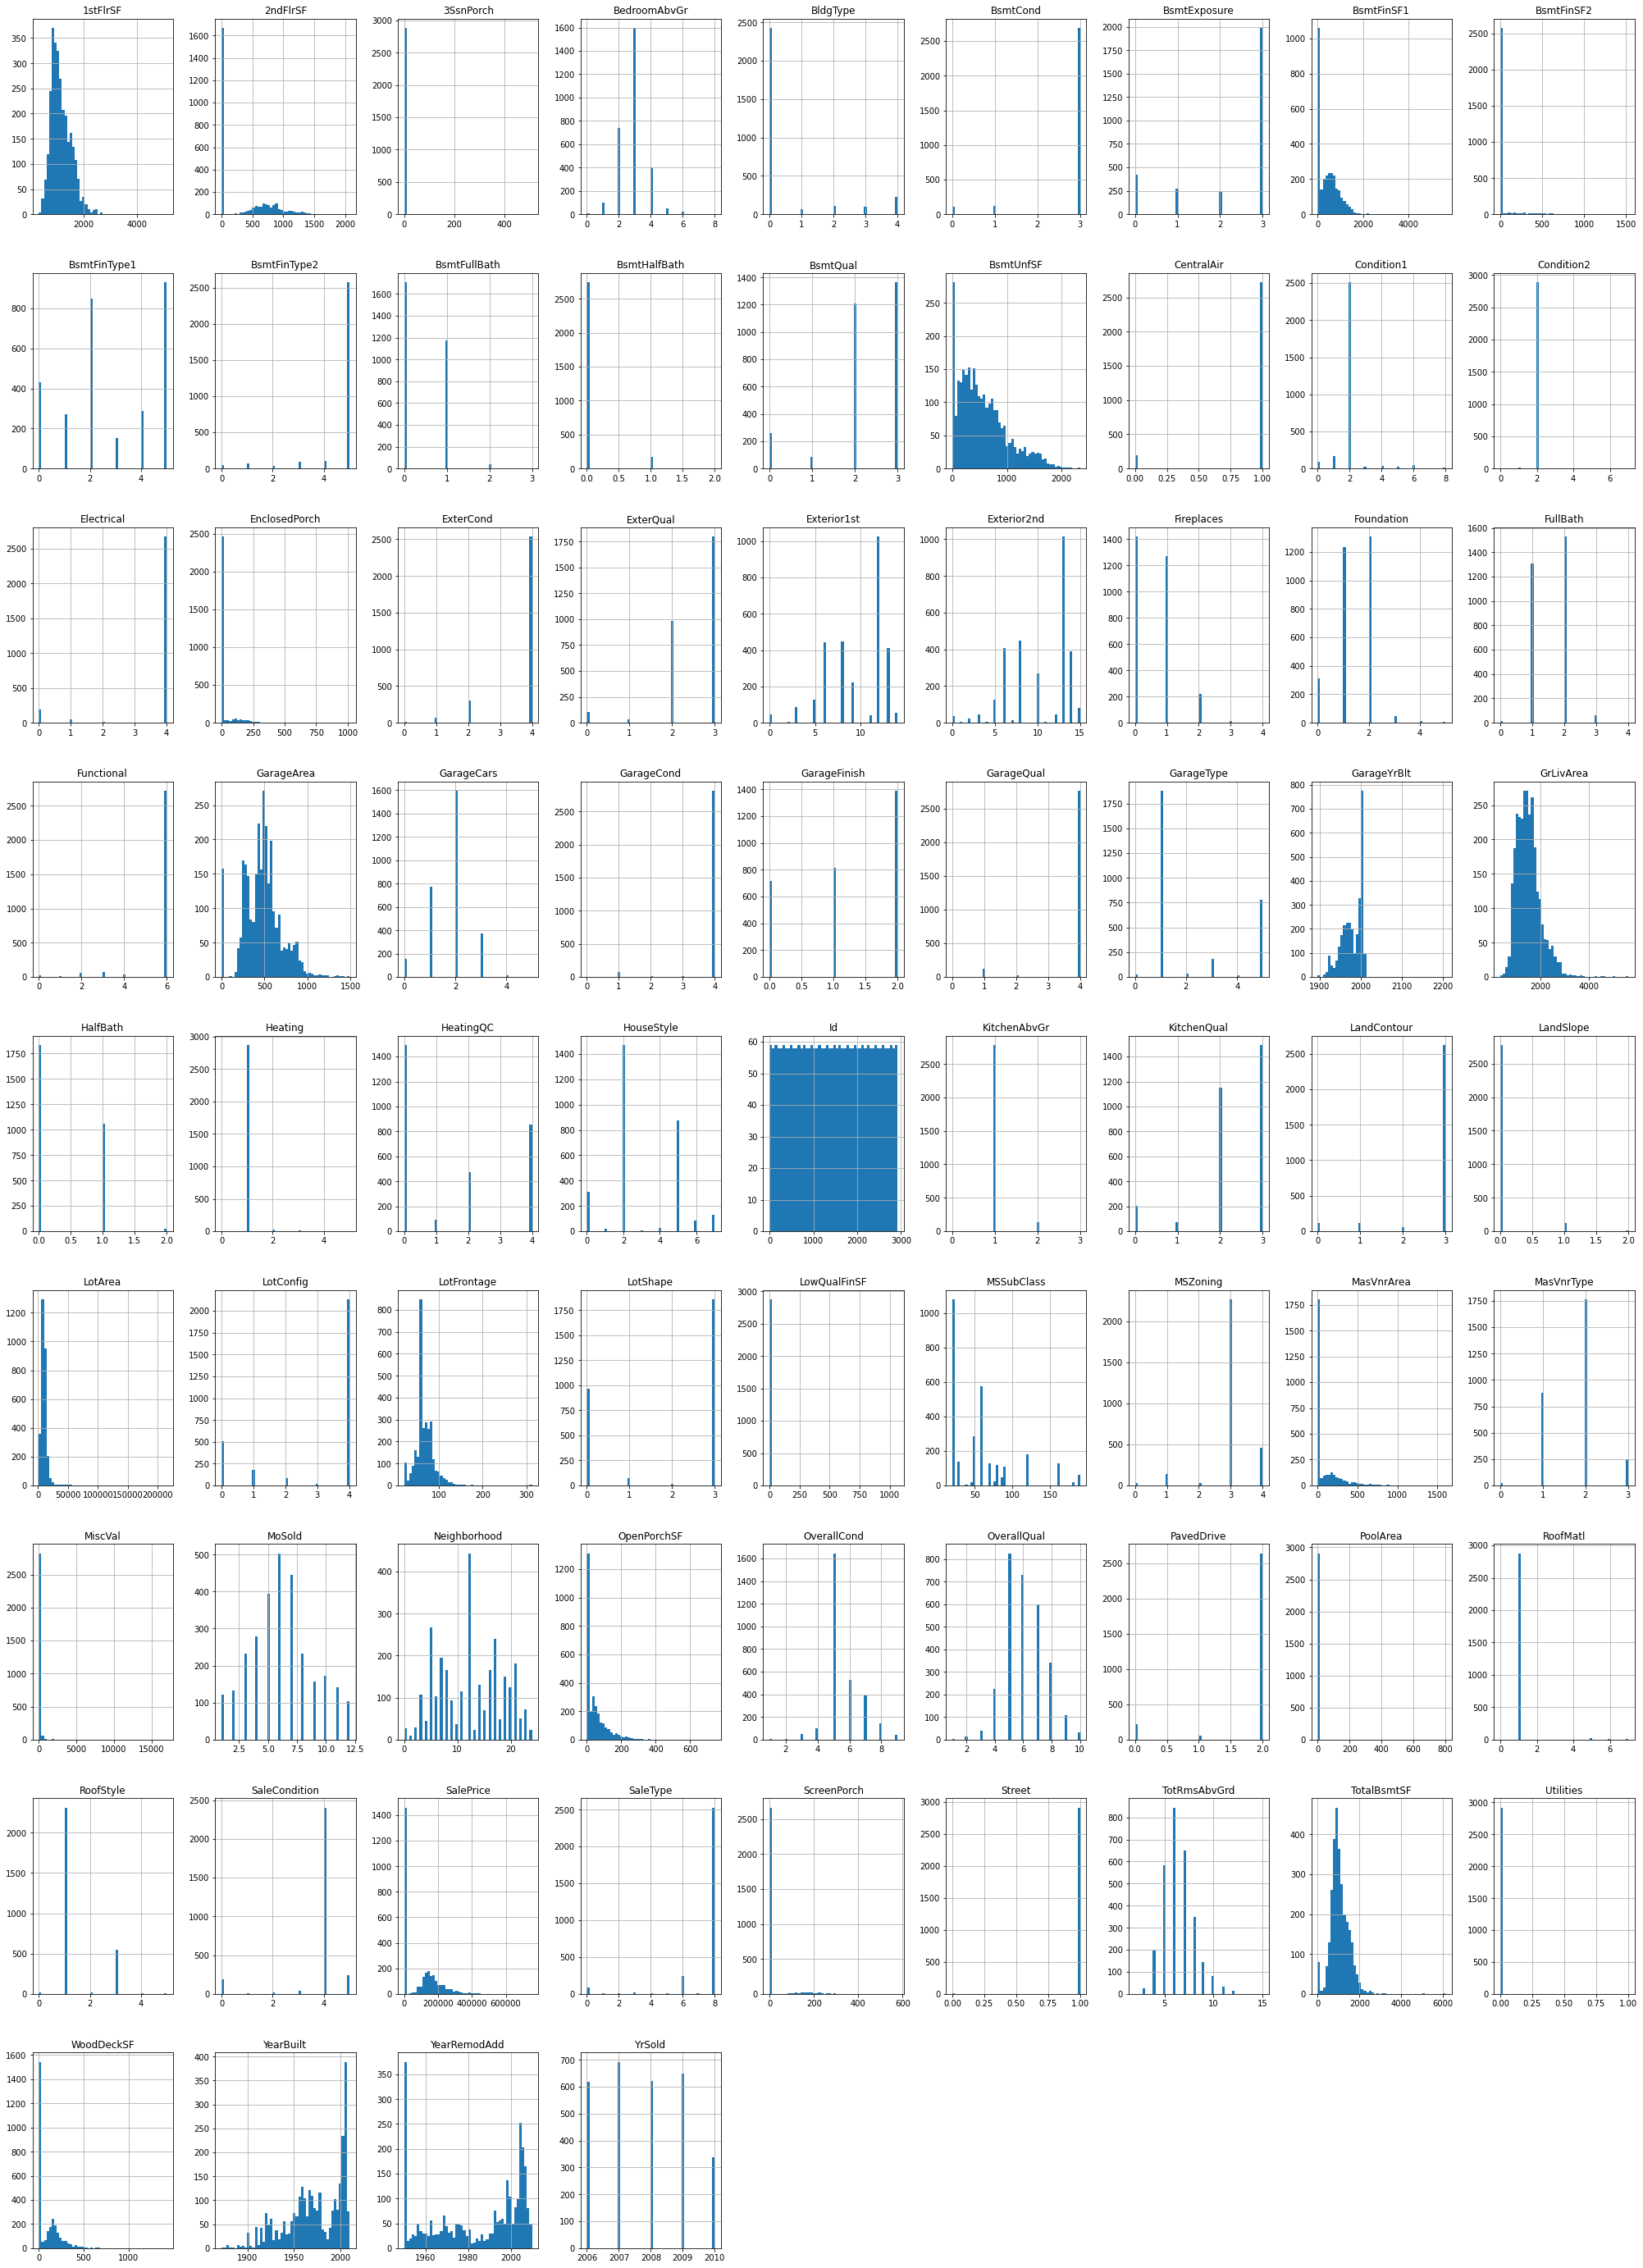

In [438]:
fig = plt.figure(figsize = (35,50))
ax = fig.gca()
data.hist(bins = 50, ax = ax)

# ***Correlations now!***

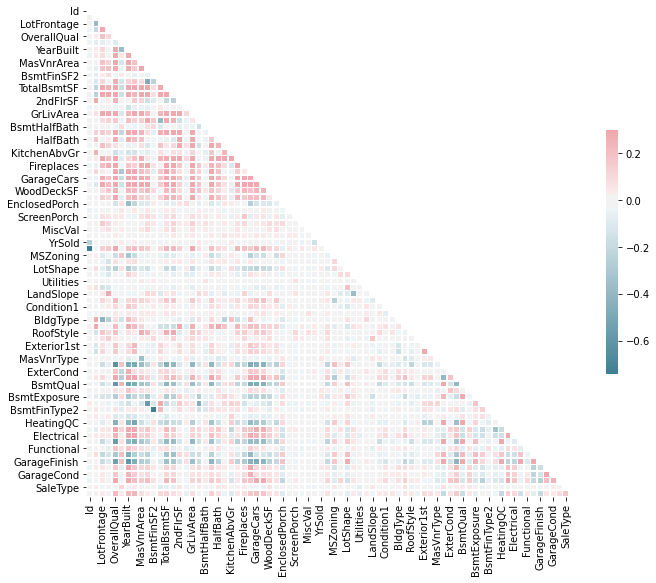

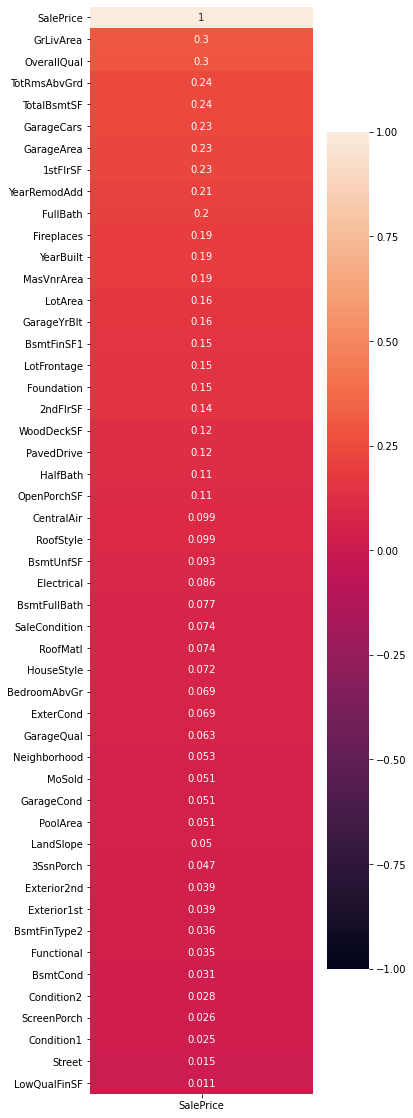

In [439]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.figure(figsize=(5,20))
sns.heatmap(data.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(50), vmin=-1, annot=True);

In [0]:
data = data.drop(['ScreenPorch', 'Condition2','BsmtCond','Functional','BsmtFinType2','Exterior1st','Exterior2nd','3SsnPorch','LandSlope','PoolArea','GarageCond','ExterCond','BedroomAbvGr','HouseStyle','RoofMatl','SaleCondition','BsmtUnfSF','RoofStyle','CentralAir'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92eff7d710>,
      dtype=object)

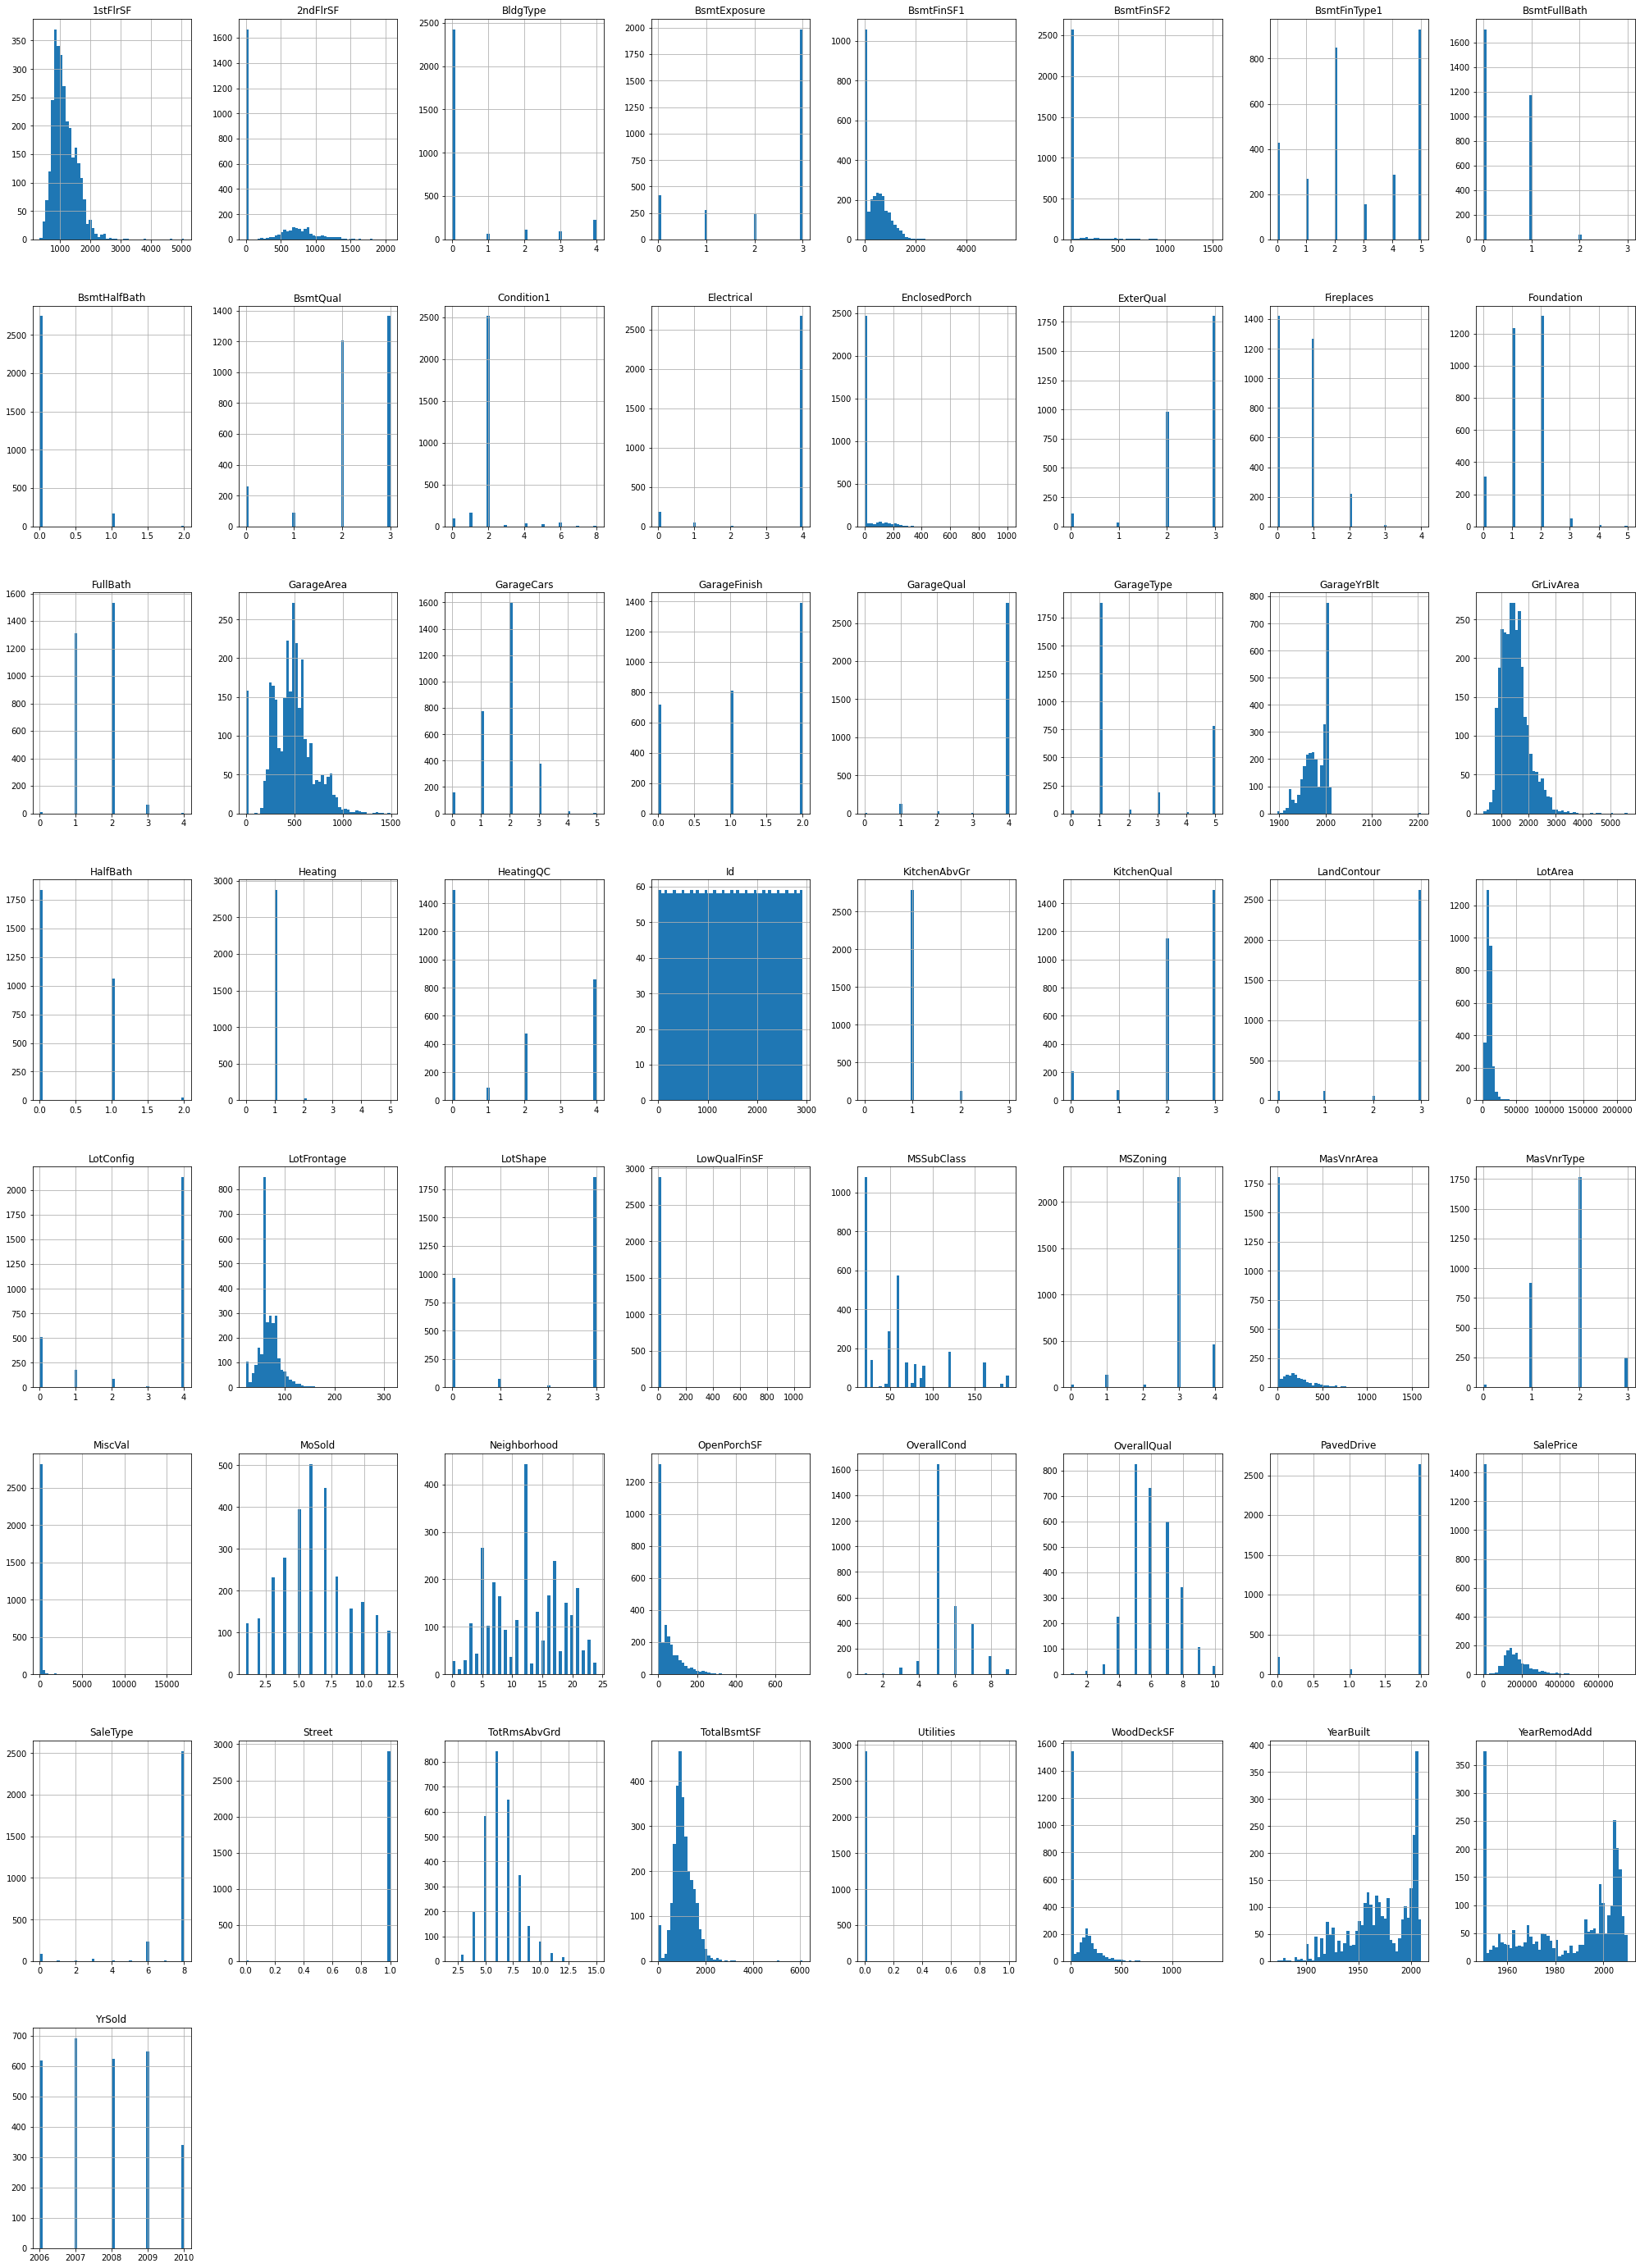

In [441]:
fig = plt.figure(figsize = (35,50))
ax = fig.gca()
data.hist(bins = 50, ax = ax)

In [0]:
data_sold = 2020-data["YrSold"]
data_remove = 2020-data["YearRemodAdd"]
data_bulit = 2020-data["YearBuilt"]

In [0]:
data = data.drop(['YrSold', 'YearRemodAdd','YearBuilt'], axis=1)

In [0]:
data["YrSold"] = data_sold
data["YearRemodAdd"] = data_remove
data["YearBuilt"] = data_bulit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92ed435320>,
      dtype=object)

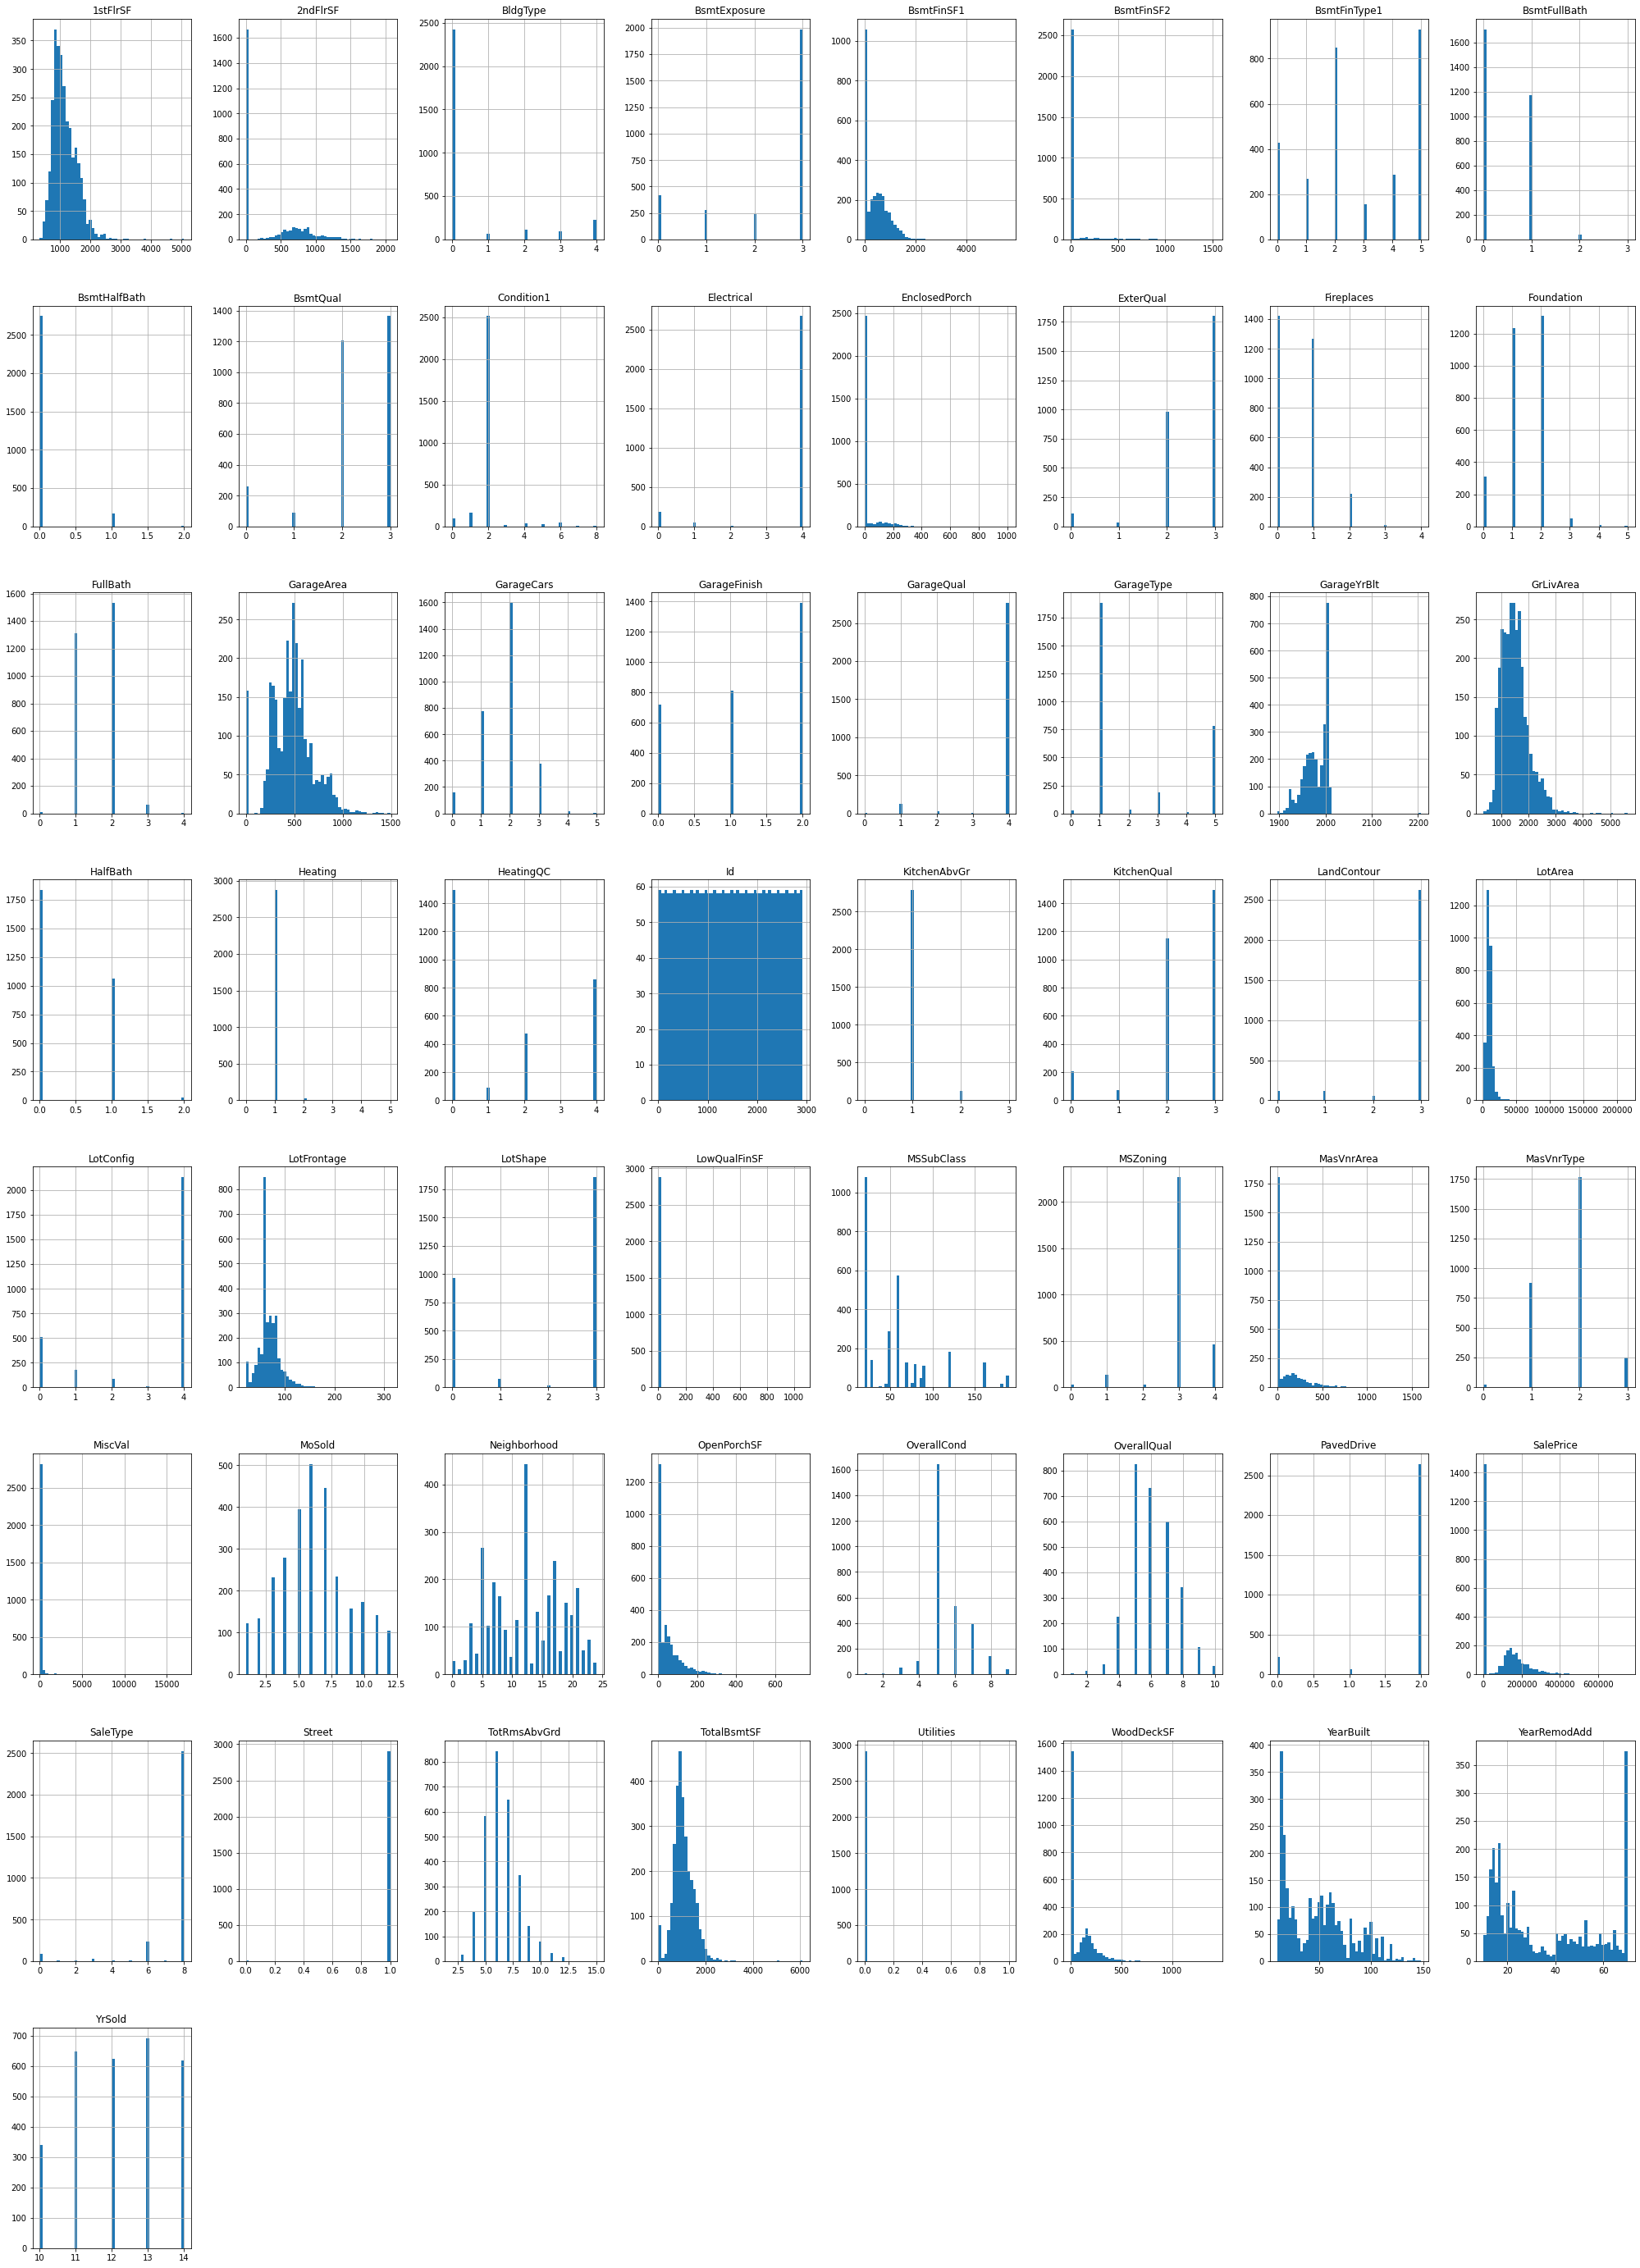

In [445]:
fig = plt.figure(figsize = (35,50))
ax = fig.gca()
data.hist(bins = 50, ax = ax)

In [0]:
from scipy.stats import boxcox
data_remove_log = boxcox((data["YearRemodAdd"]),0.5)
data_yrbuilt_log = boxcox((data["YearBuilt"]),0.5)
#data_op_log = boxcox((data["OpenPorchSF"]),1)
data_grage_log = boxcox((data["GarageYrBlt"]),0.5)
#data_bsmt_log = boxcox((data["BsmtFinSF1"]),1)

In [0]:
data["YearRemodAdd"] = data_remove_log
data["YearBuilt"] = data_yrbuilt_log
data["GarageYrBlt"] = data_grage_log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92ea0680b8>,
      dtype=object)

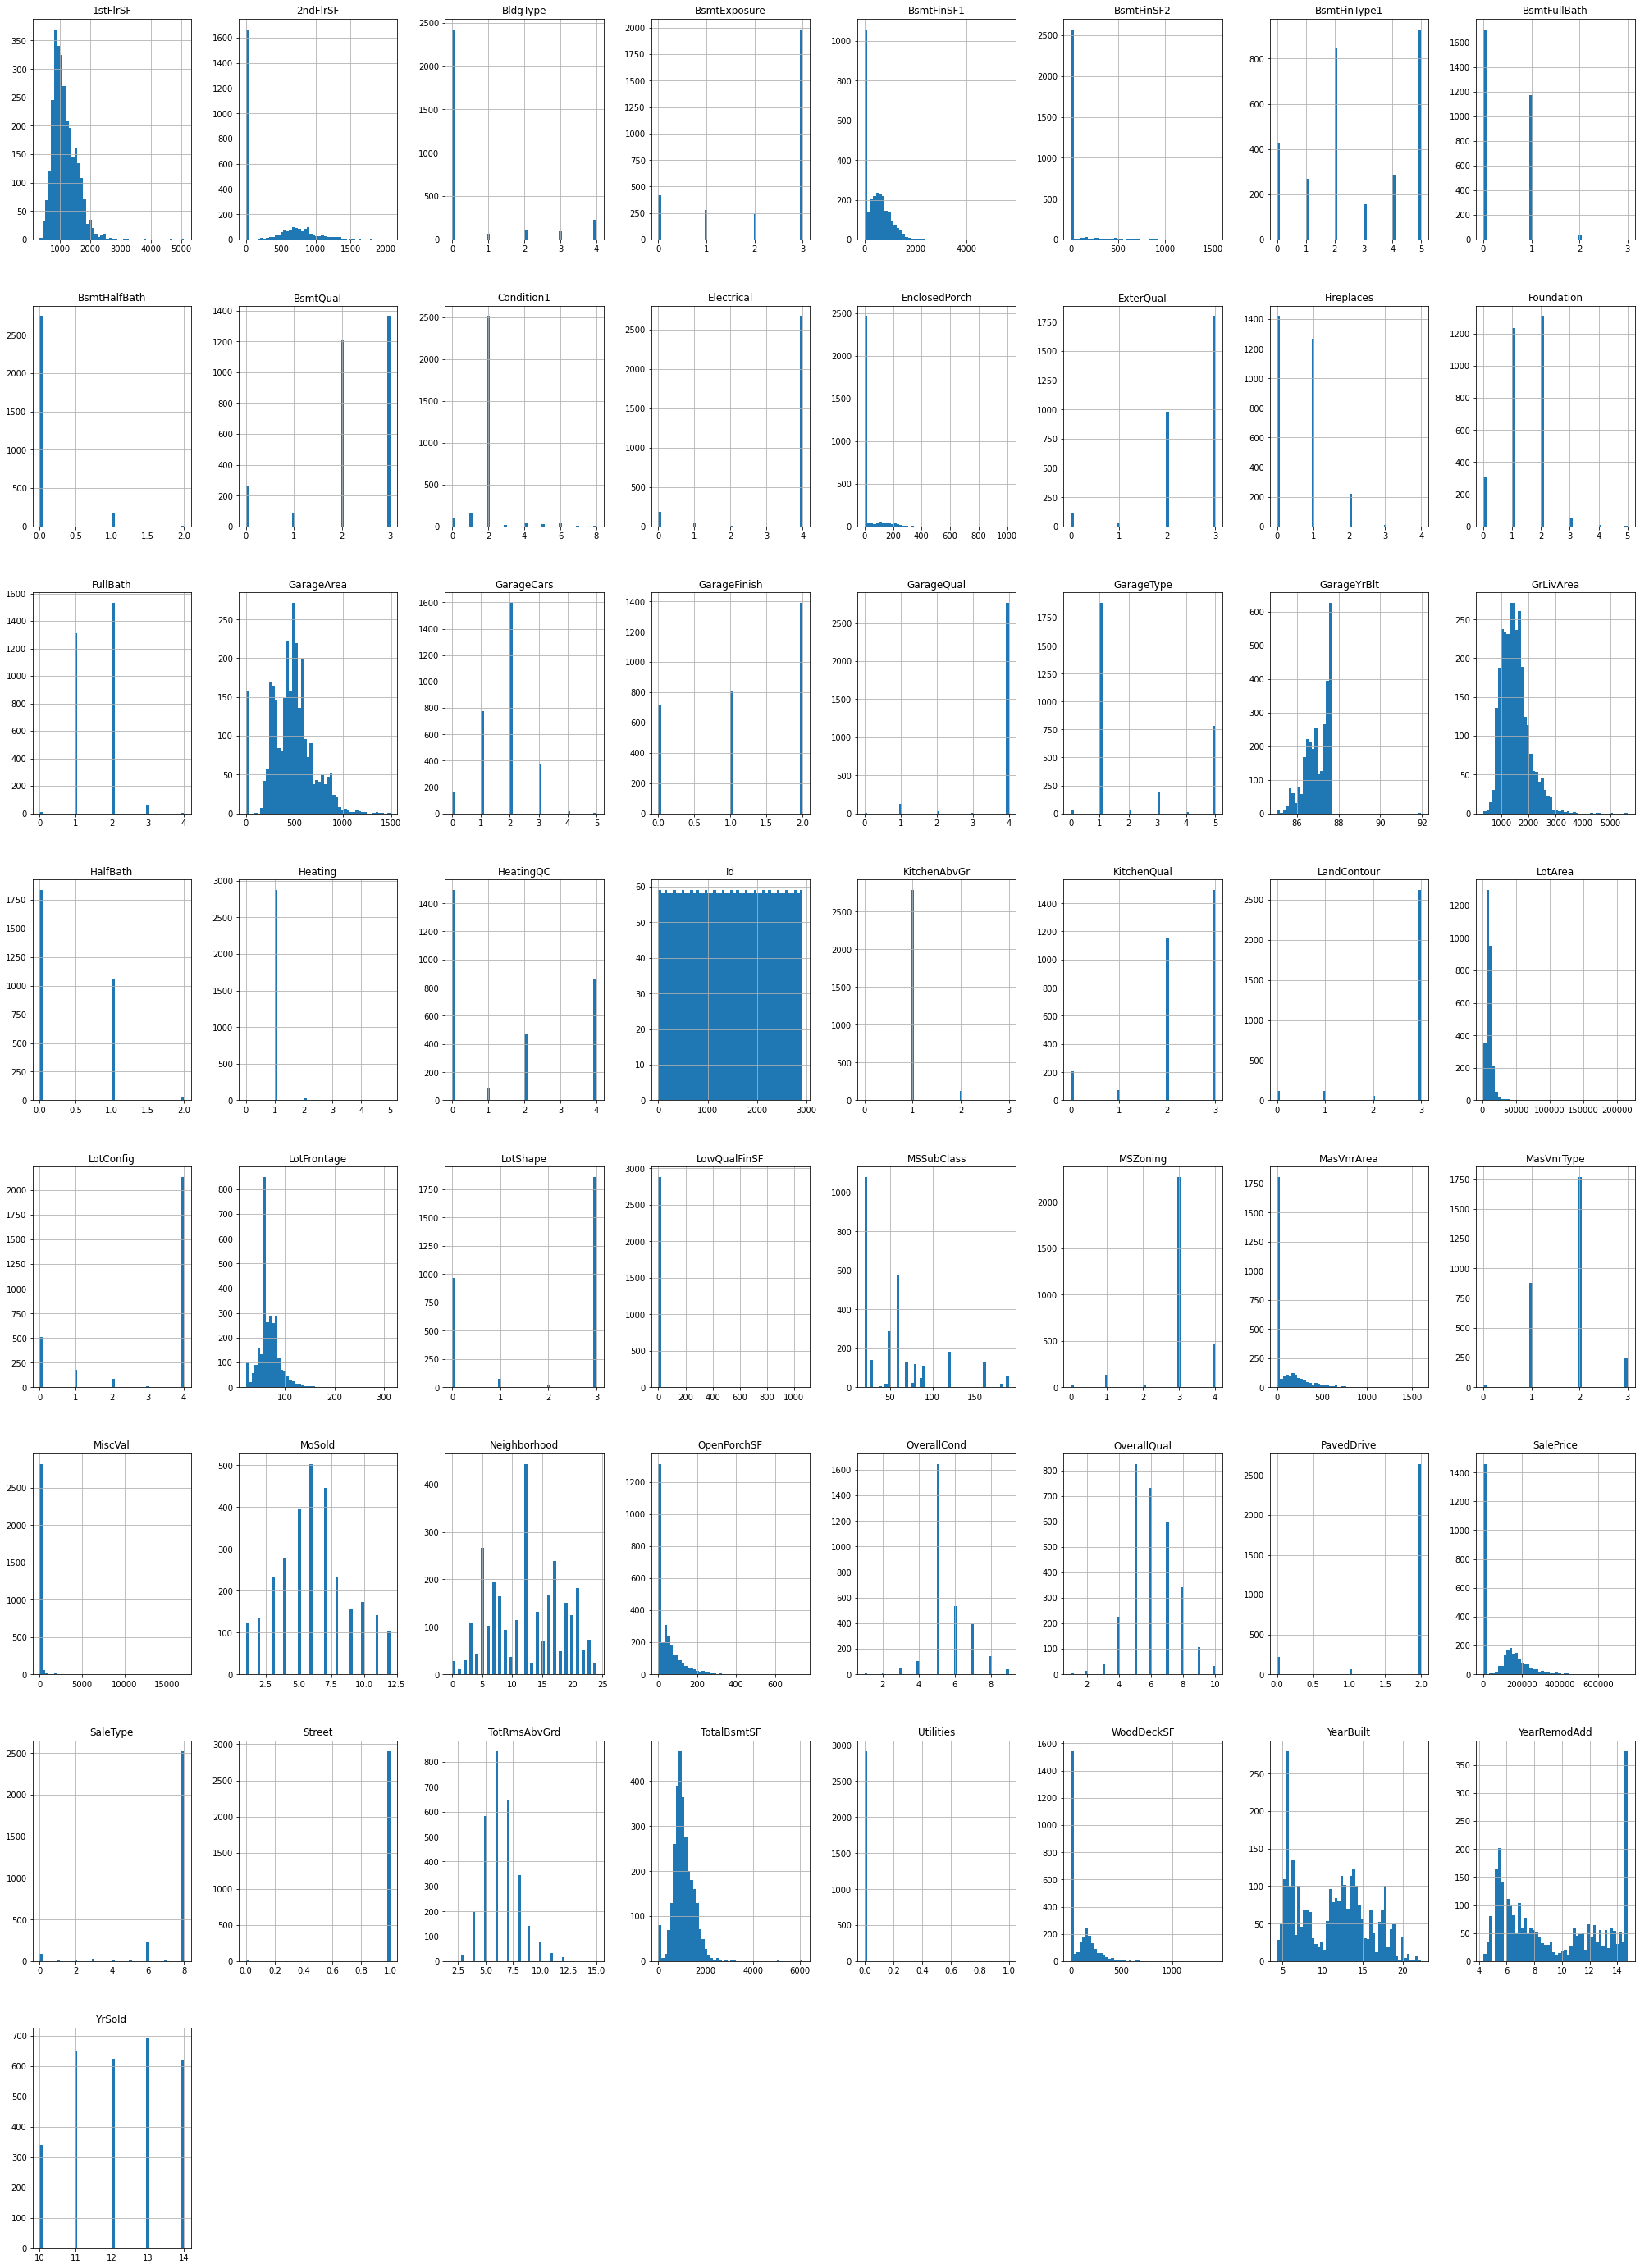

In [448]:
fig = plt.figure(figsize = (35,50))
ax = fig.gca()
data.hist(bins = 50, ax = ax)

In [449]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,Heating,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,YrSold,YearRemodAdd,YearBuilt
0,1,60,65.0,8450,7,5,196.0,706.0,0.0,856.0,856,854,0,1710,1.0,0.0,2,1,1,8,0,87.509776,2.0,548.0,0,61,0,0,2,208500,3,1,3,3,0,4,5,2,0,1,2,2,2,3,2,1,0,4,2,1,1,4,2,8,12,6.246211,6.246211
1,2,20,80.0,9600,6,8,0.0,978.0,0.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,1,6,1,86.904443,2.0,460.0,298,0,0,0,5,181500,3,1,3,3,0,2,24,1,0,2,3,1,2,1,0,1,0,4,3,1,1,4,2,8,13,11.266499,11.266499
2,3,60,68.0,11250,7,5,162.0,486.0,0.0,920.0,920,866,0,1786,1.0,0.0,2,1,1,6,1,87.465077,2.0,608.0,0,42,0,0,9,223500,3,1,0,3,0,4,5,2,0,1,2,2,2,2,2,1,0,4,2,1,1,4,2,8,12,6.485281,6.717798
3,4,70,60.0,9550,7,5,0.0,216.0,0.0,756.0,961,756,0,1717,1.0,0.0,1,0,1,7,1,87.397987,3.0,642.0,0,35,272,0,2,140000,3,1,0,3,0,0,6,2,0,2,3,0,3,3,0,1,2,4,2,5,2,4,2,8,14,12.142136,18.493902
4,5,60,84.0,14260,8,5,350.0,655.0,0.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,1,9,1,87.442719,3.0,836.0,192,84,0,0,12,250000,3,1,0,3,0,2,15,2,0,1,2,2,2,0,2,1,0,4,2,1,1,4,2,8,12,6.944272,6.944272


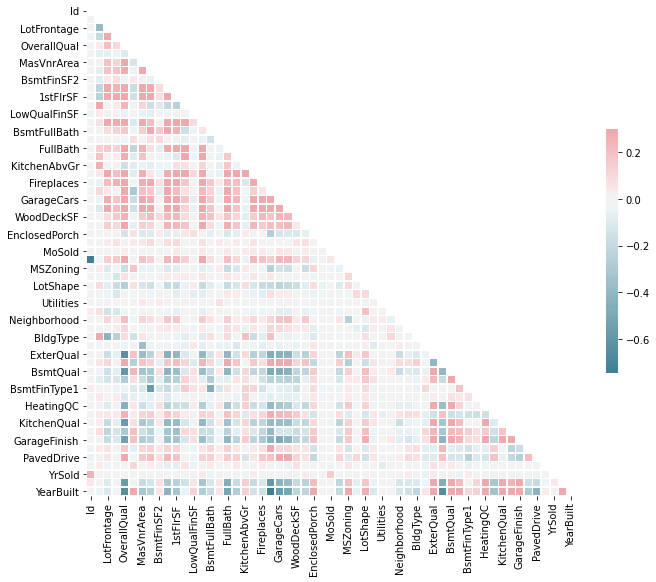

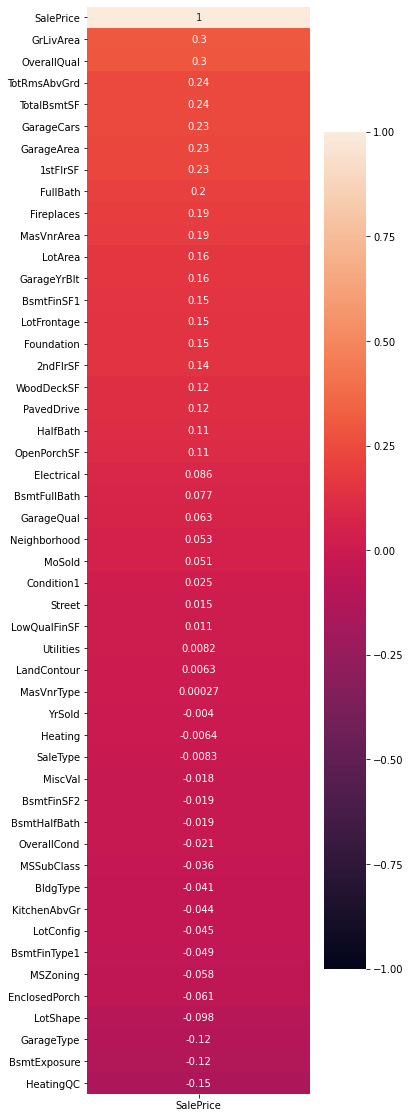

In [450]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.figure(figsize=(5,20))
sns.heatmap(data.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(50), vmin=-1, annot=True);

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   MasVnrArea     2919 non-null   float64
 7   BsmtFinSF1     2919 non-null   float64
 8   BsmtFinSF2     2919 non-null   float64
 9   TotalBsmtSF    2919 non-null   float64
 10  1stFlrSF       2919 non-null   int64  
 11  2ndFlrSF       2919 non-null   int64  
 12  LowQualFinSF   2919 non-null   int64  
 13  GrLivArea      2919 non-null   int64  
 14  BsmtFullBath   2919 non-null   float64
 15  BsmtHalfBath   2919 non-null   float64
 16  FullBath       2919 non-null   int64  
 17  HalfBath       2919 non-null   int64  
 18  KitchenA

# To generate whole column regression plots

In [452]:
column = list(data.columns)
type(column)

list

In [453]:
sp = np.asarray(data['SalePrice'])
type(sp)

numpy.ndarray

In [0]:
def num_plot(data):
    for col in column:
      if col != 'SalePrice':
        print(col)
        print(data[col].dtype)
        plt.figure(figsize=(10, 10))
        ax = sns.regplot(x=col, y=sp, data=data)
        plt.show();


Id
int64


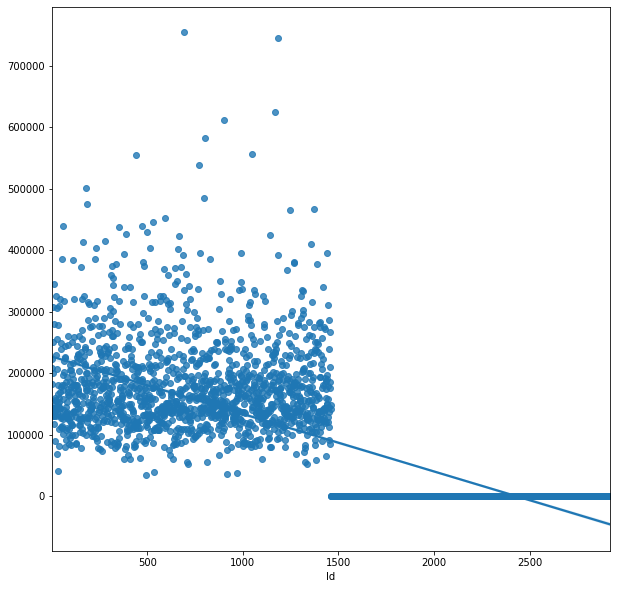

MSSubClass
int64


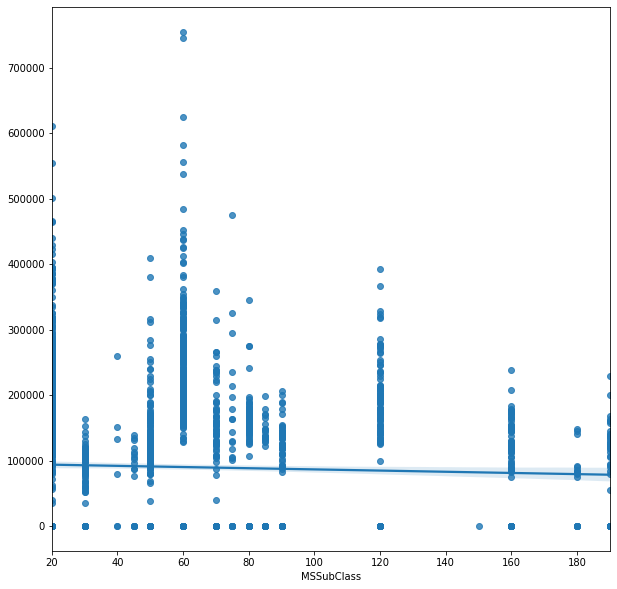

LotFrontage
float64


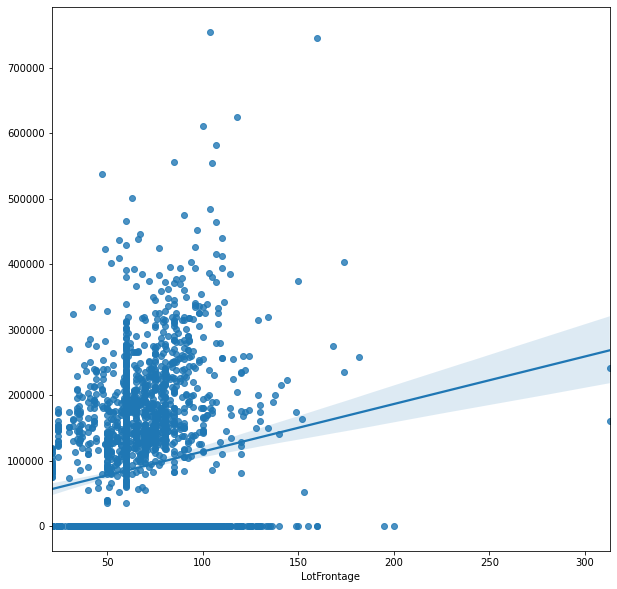

LotArea
int64


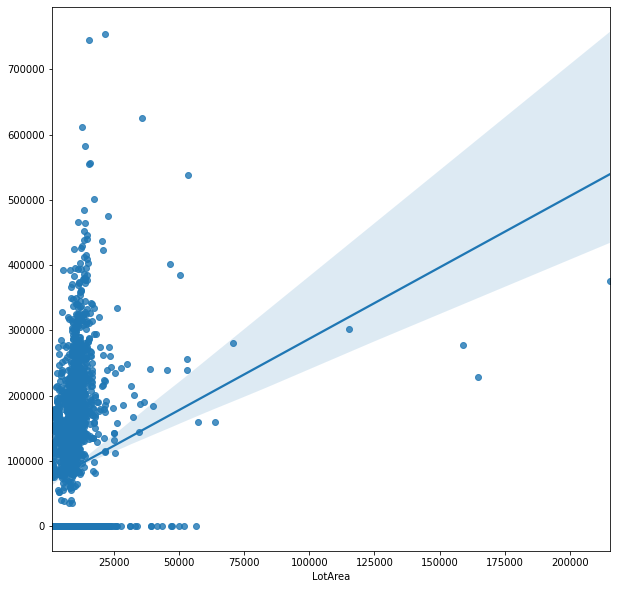

OverallQual
int64


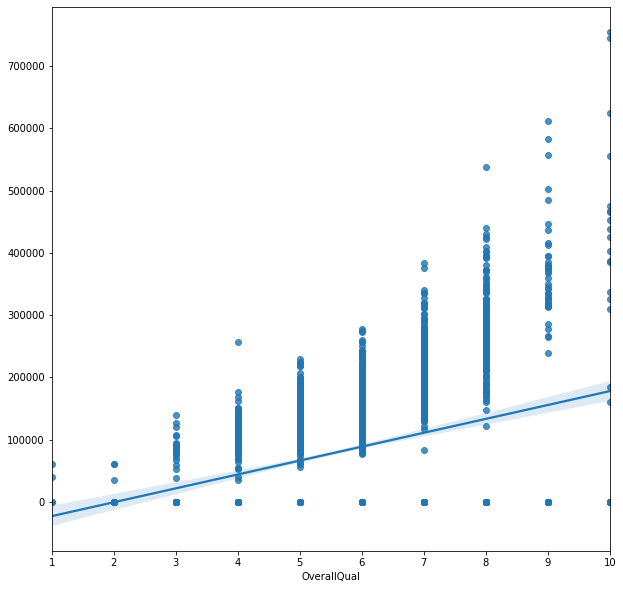

OverallCond
int64


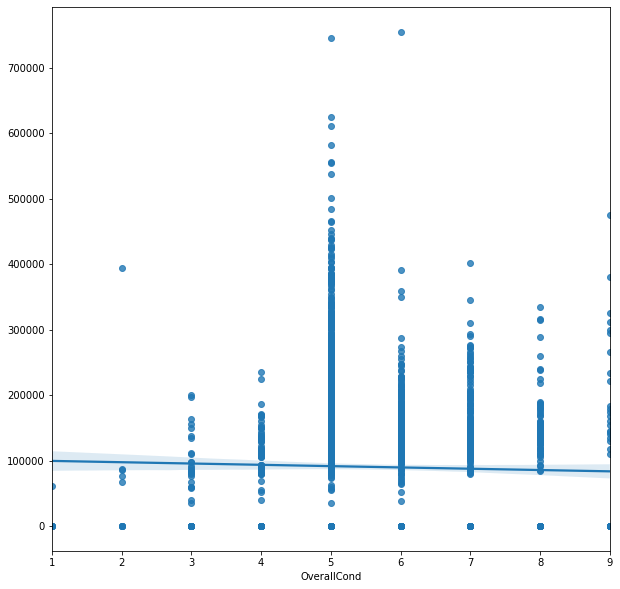

MasVnrArea
float64


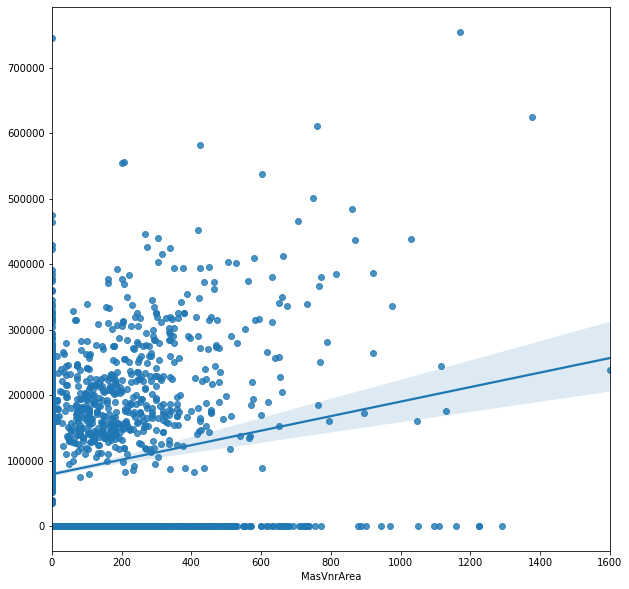

BsmtFinSF1
float64


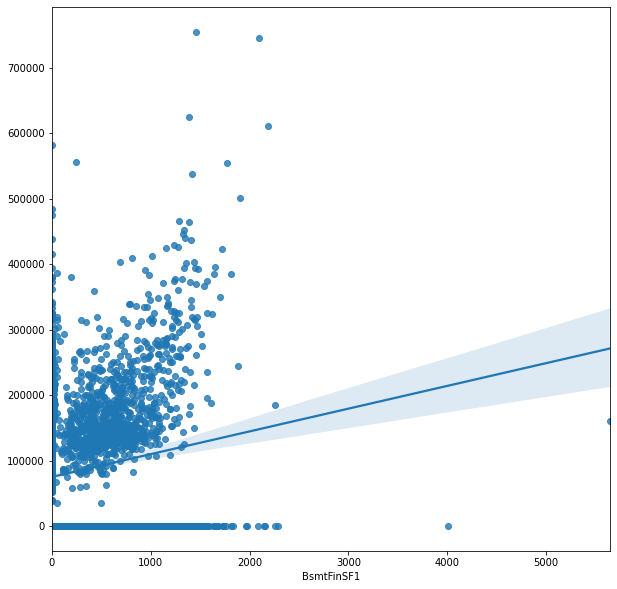

BsmtFinSF2
float64


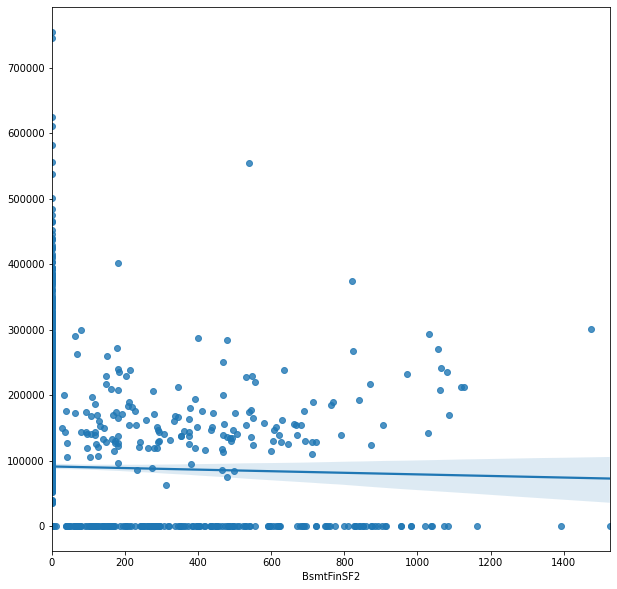

TotalBsmtSF
float64


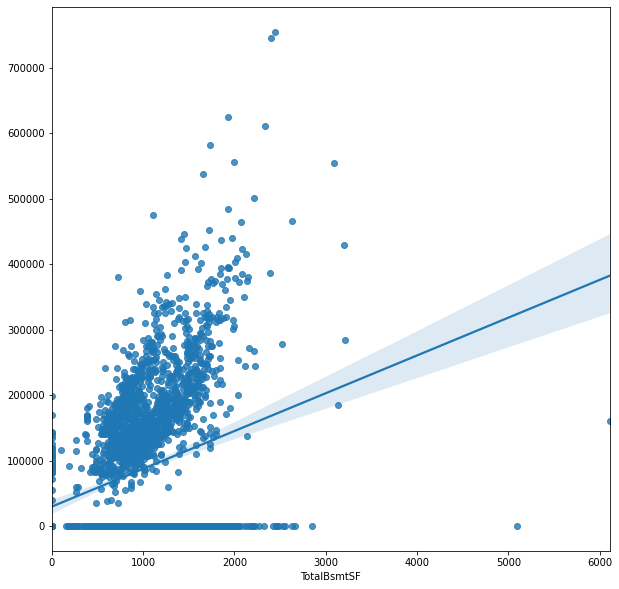

1stFlrSF
int64


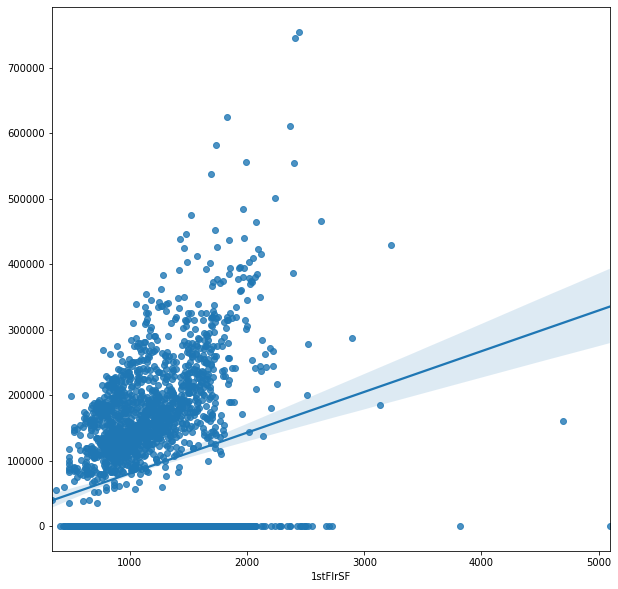

2ndFlrSF
int64


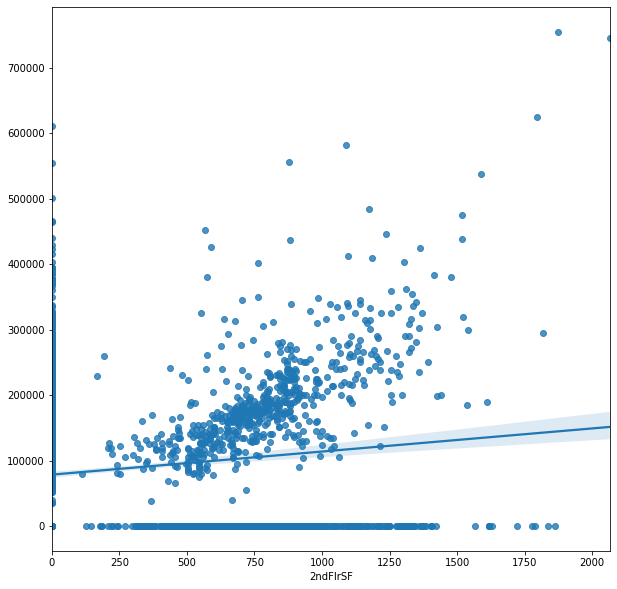

LowQualFinSF
int64


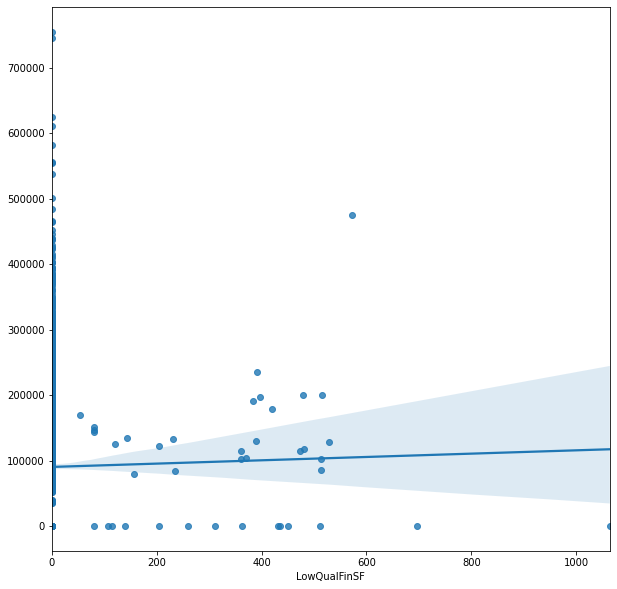

GrLivArea
int64


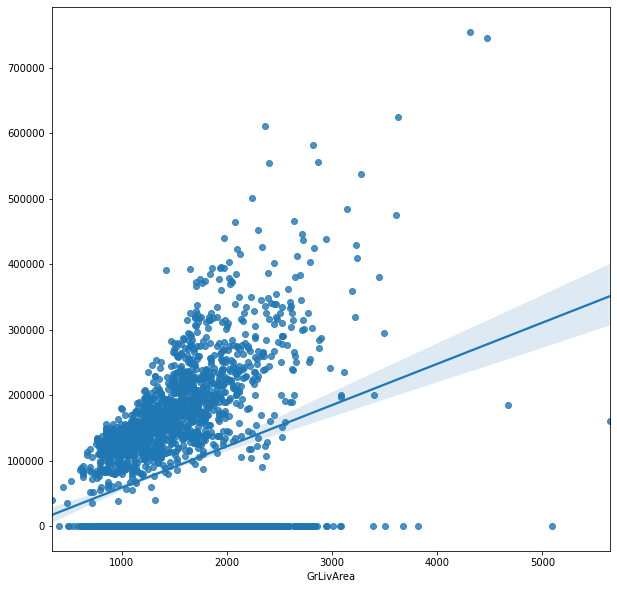

BsmtFullBath
float64


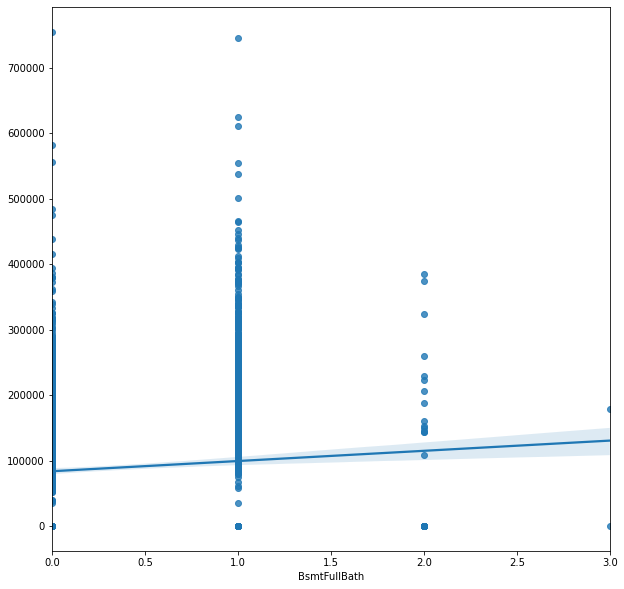

BsmtHalfBath
float64


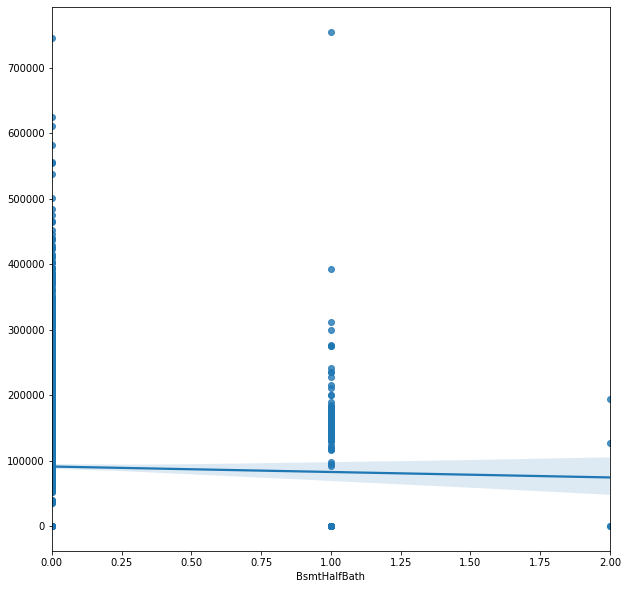

FullBath
int64


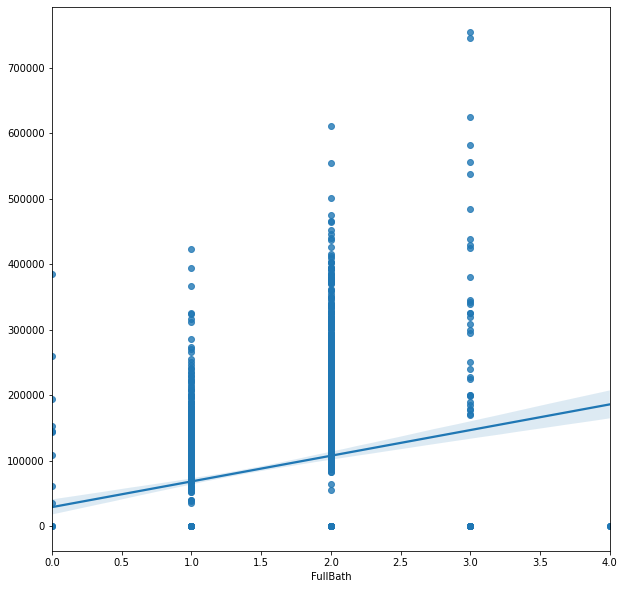

HalfBath
int64


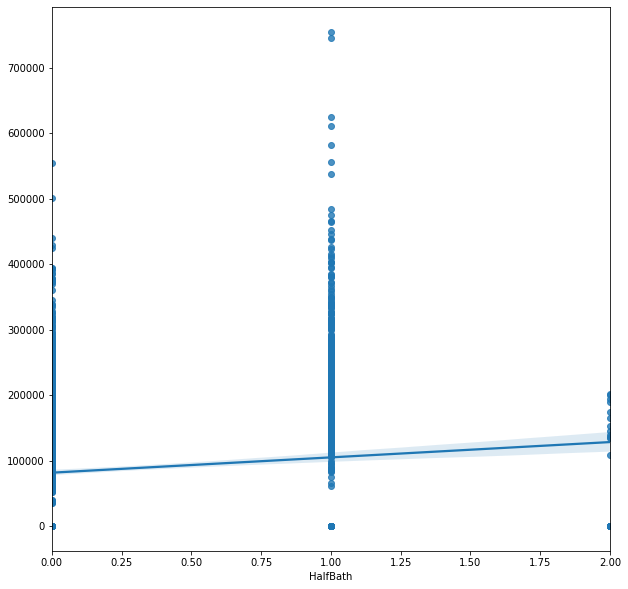

KitchenAbvGr
int64


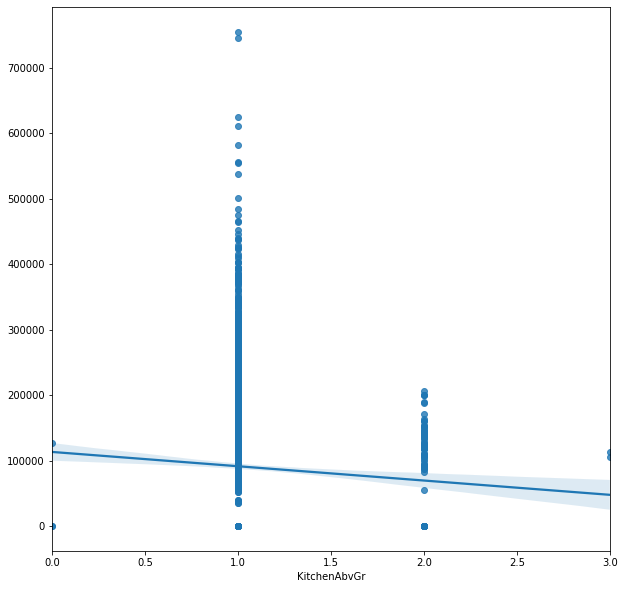

TotRmsAbvGrd
int64


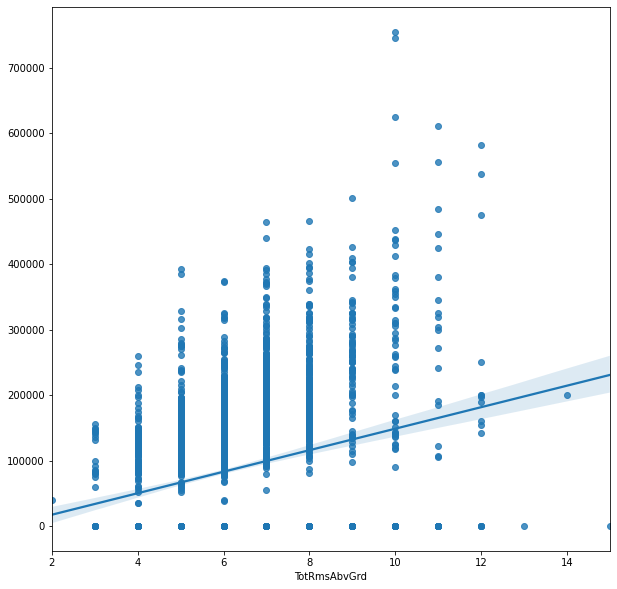

Fireplaces
int64


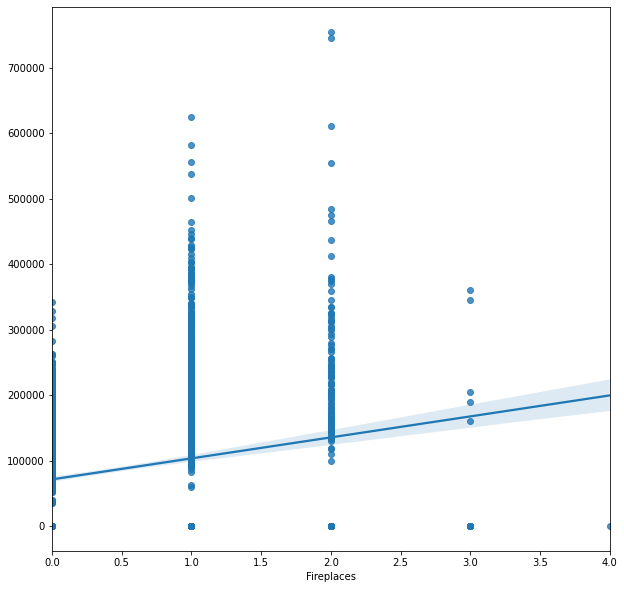

GarageYrBlt
float64


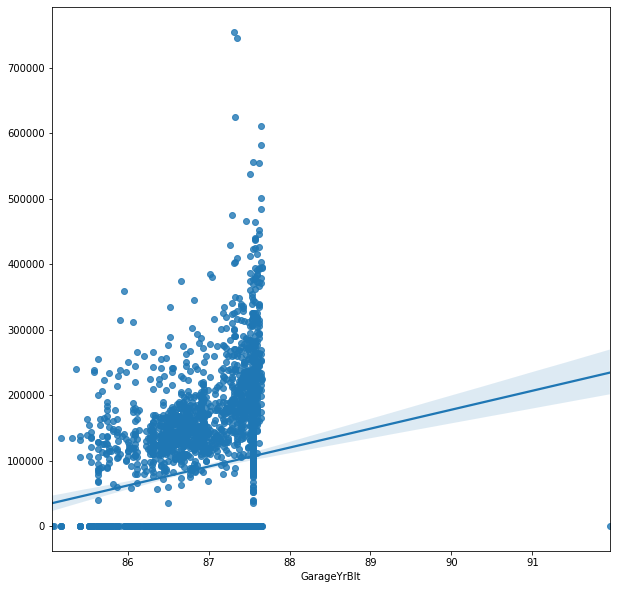

GarageCars
float64


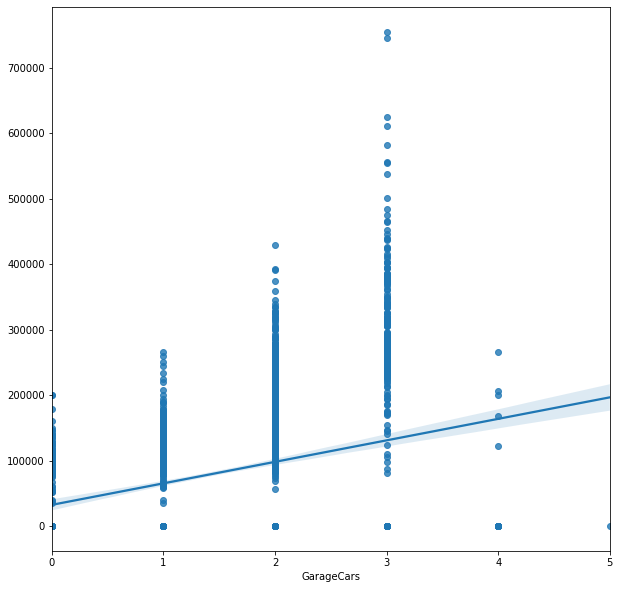

GarageArea
float64


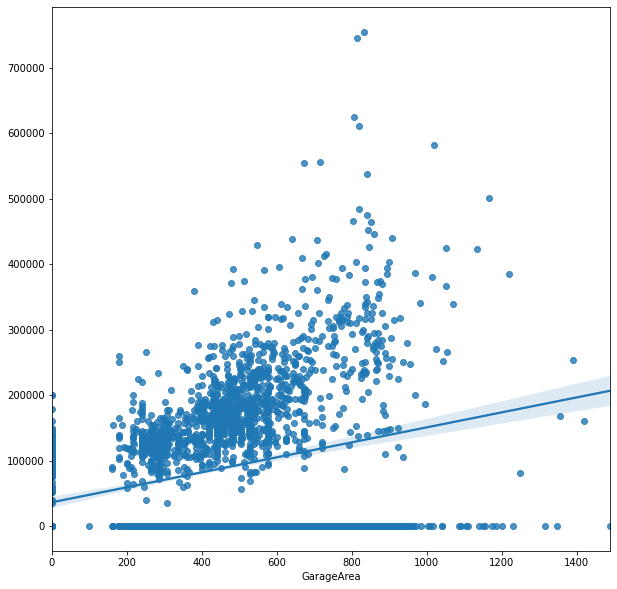

WoodDeckSF
int64


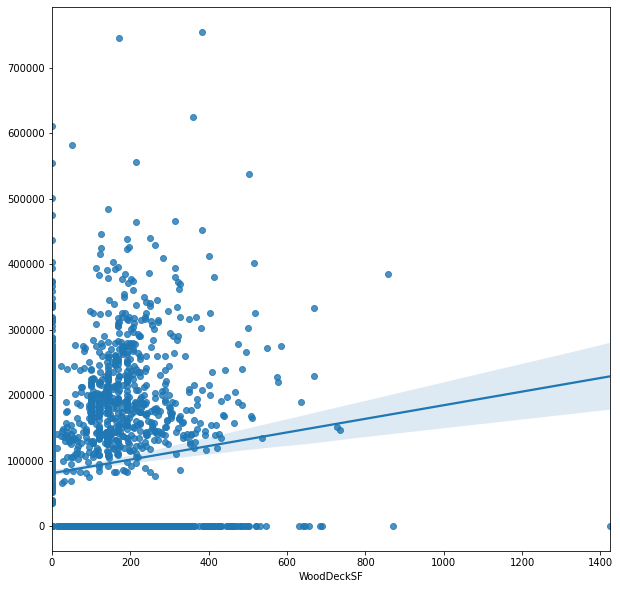

OpenPorchSF
int64


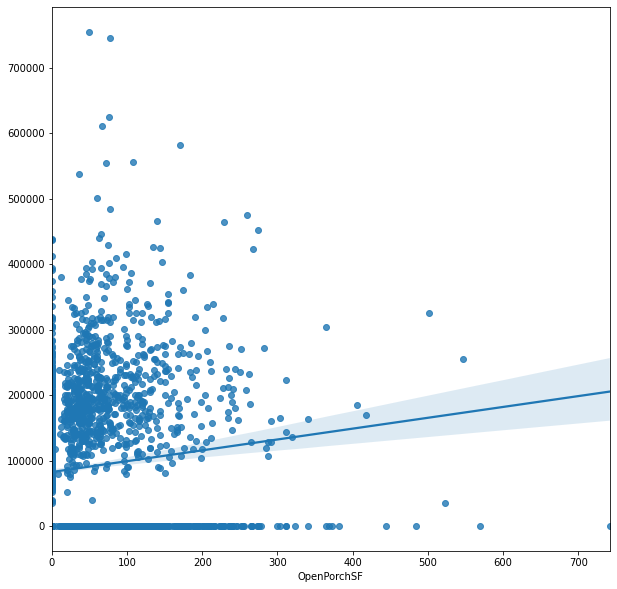

EnclosedPorch
int64


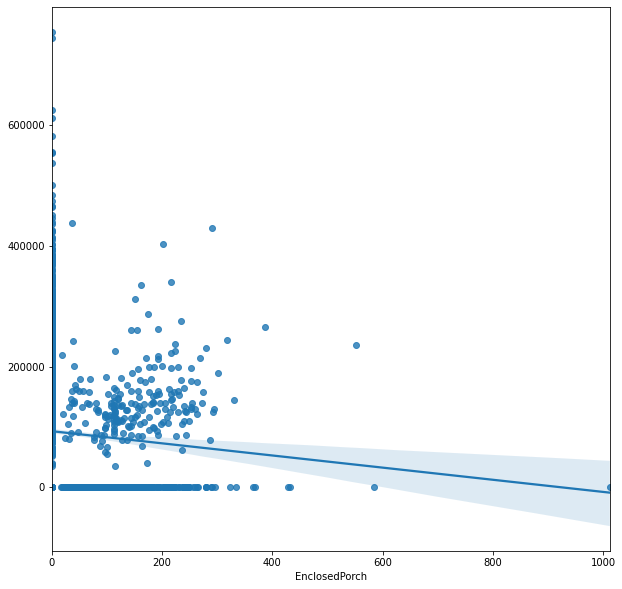

MiscVal
int64


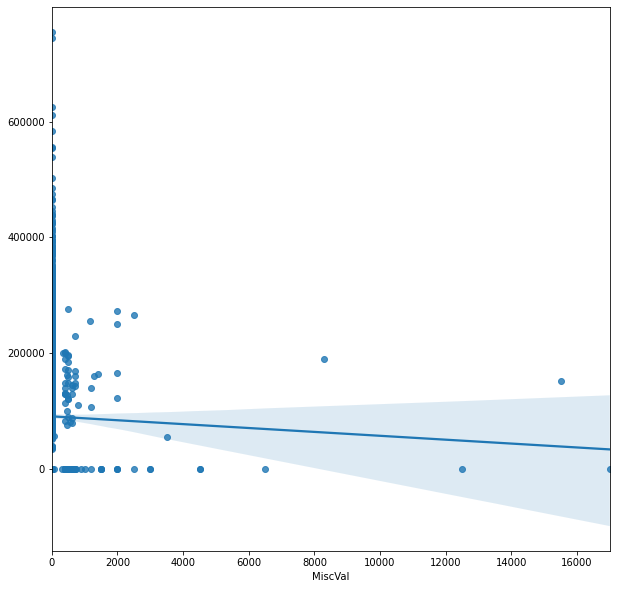

MoSold
int64


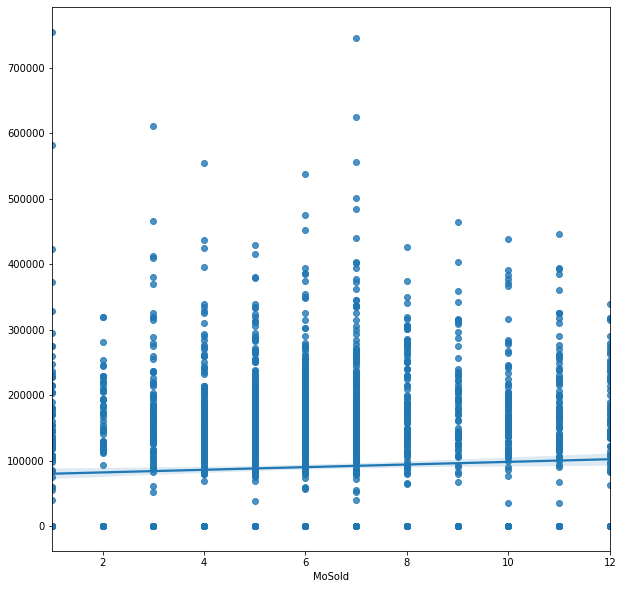

MSZoning
int64


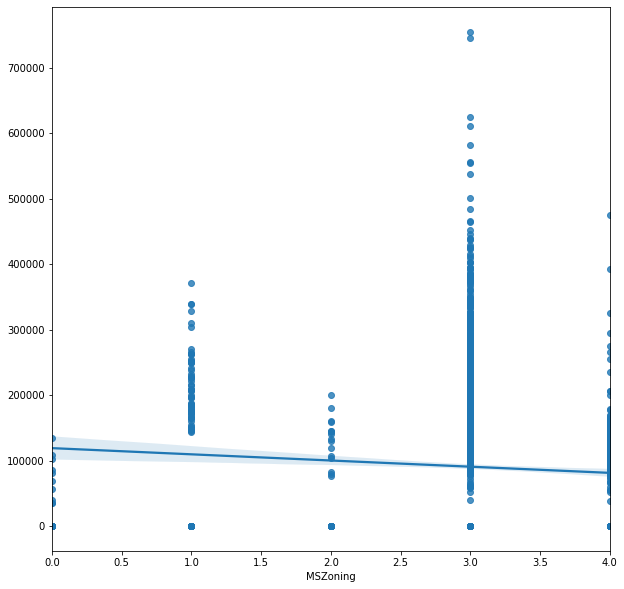

Street
int64


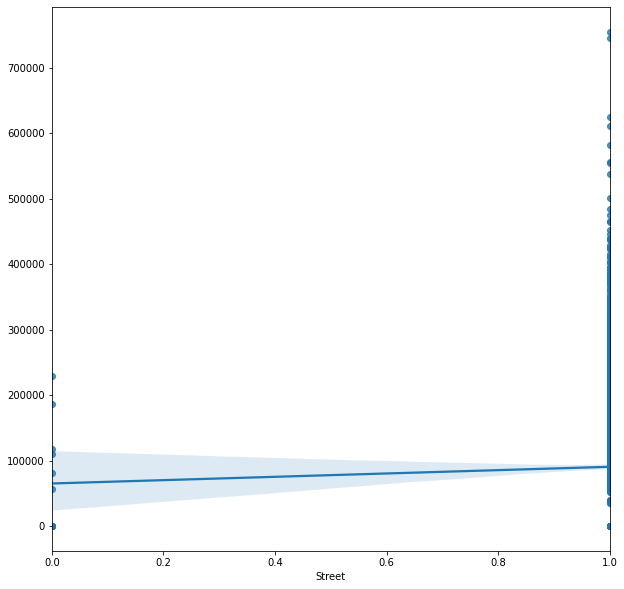

LotShape
int64


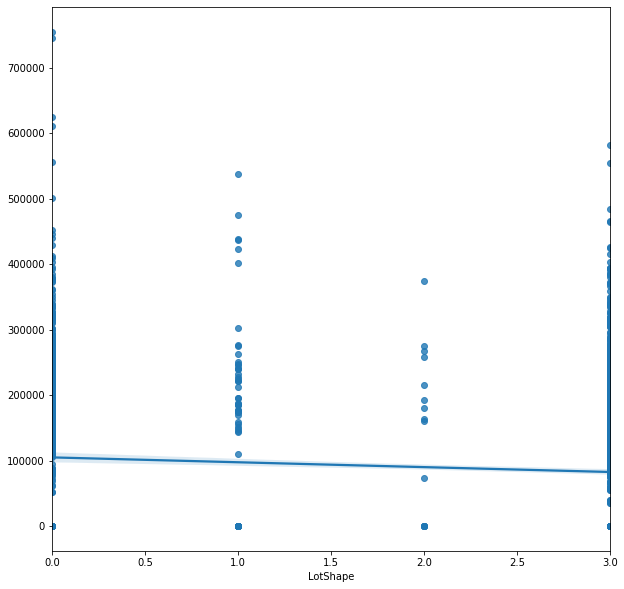

LandContour
int64


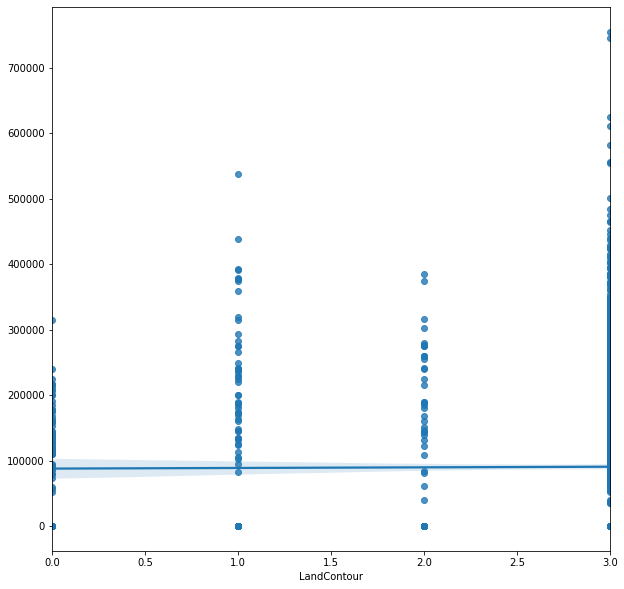

Utilities
int64


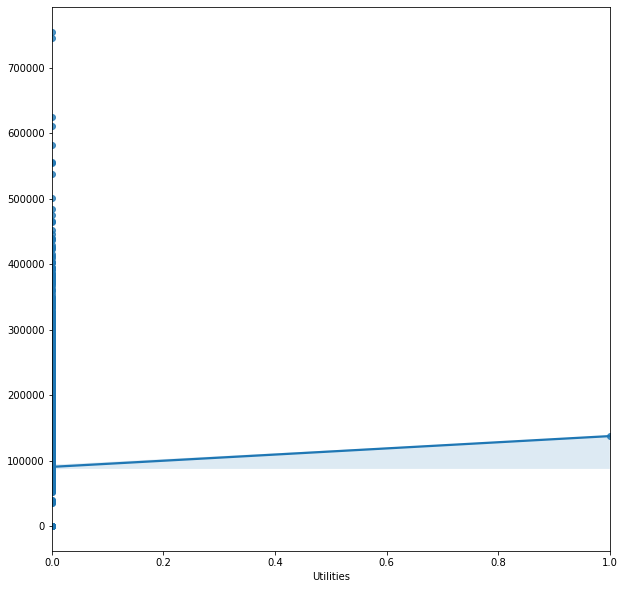

LotConfig
int64


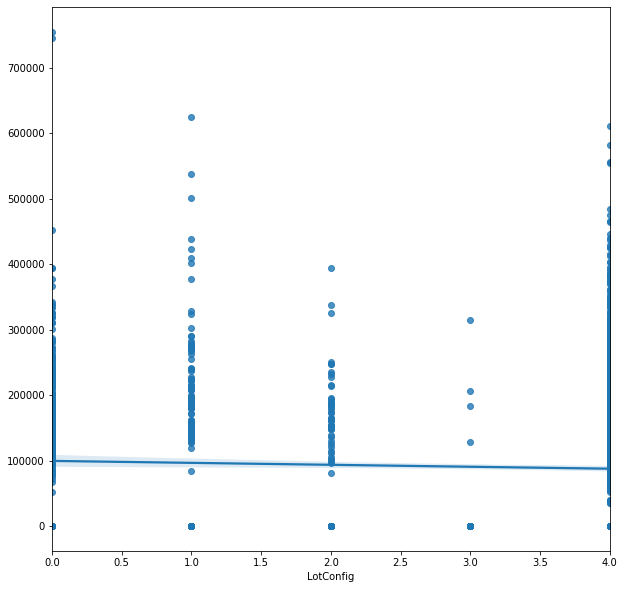

Neighborhood
int64


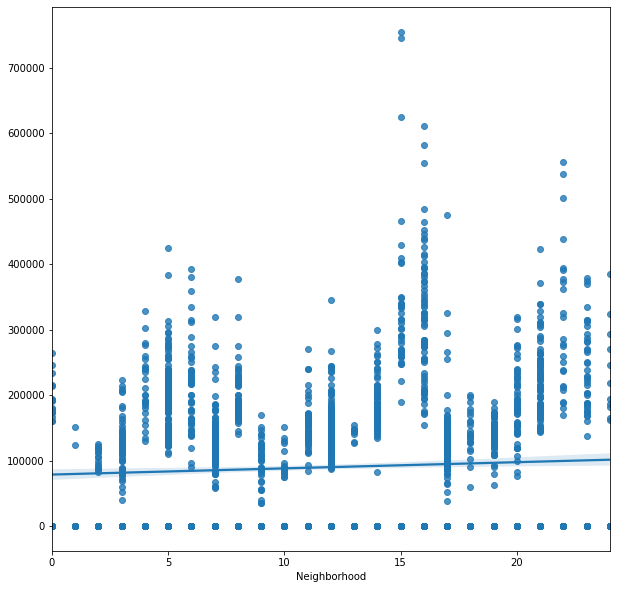

Condition1
int64


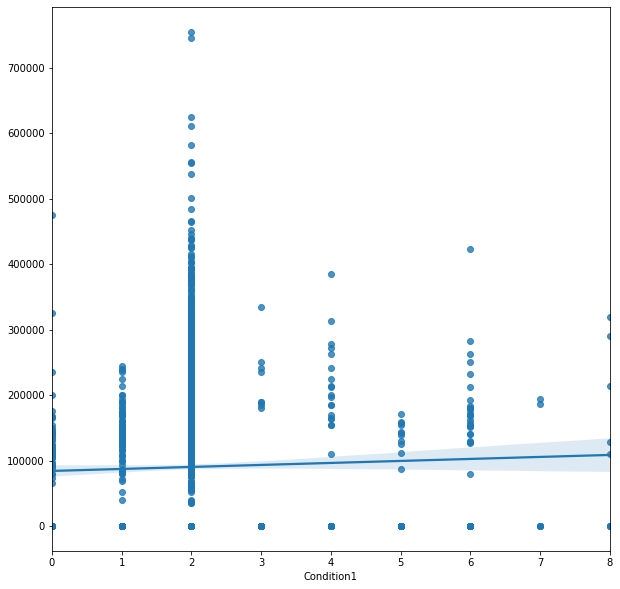

BldgType
int64


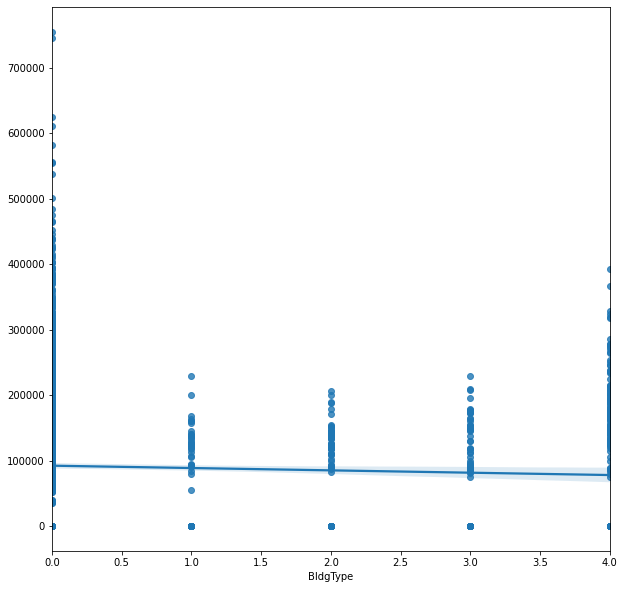

MasVnrType
int64


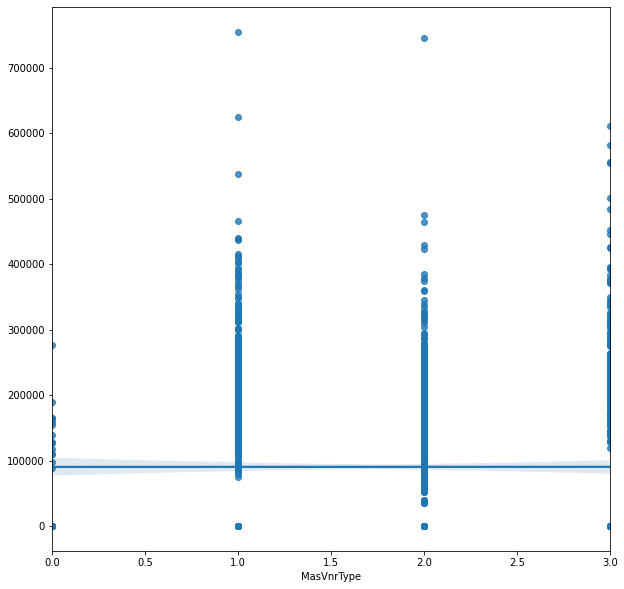

ExterQual
int64


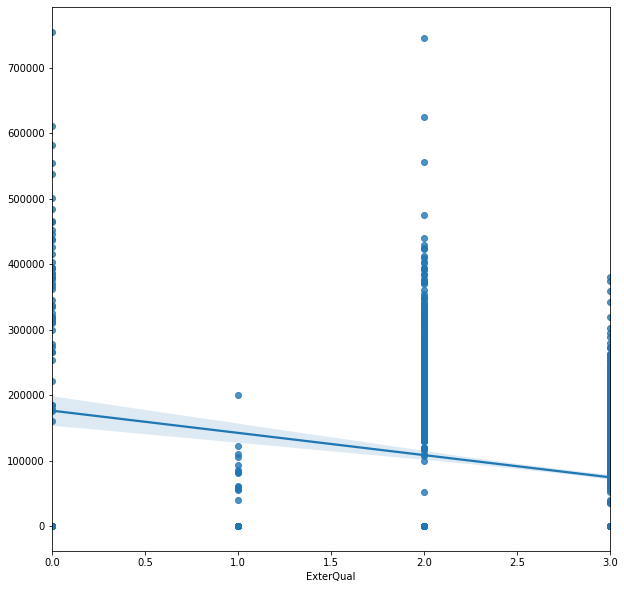

Foundation
int64


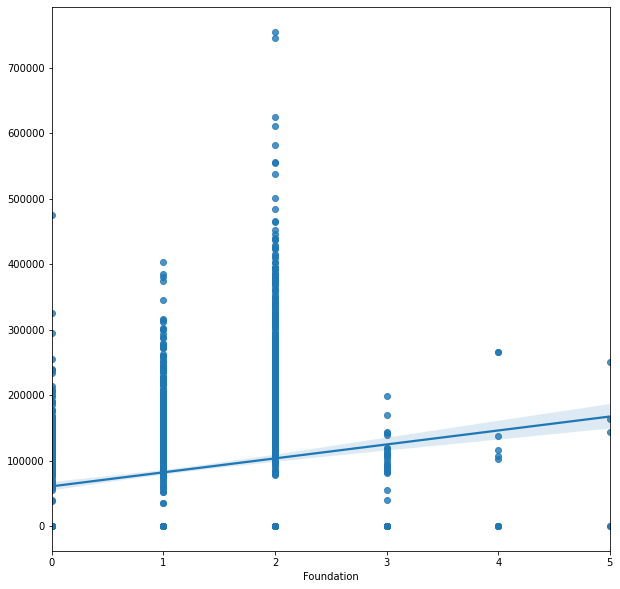

BsmtQual
int64


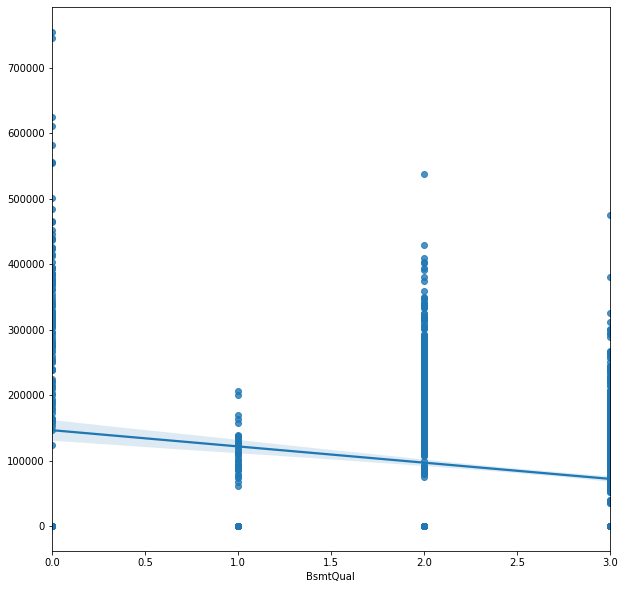

BsmtExposure
int64


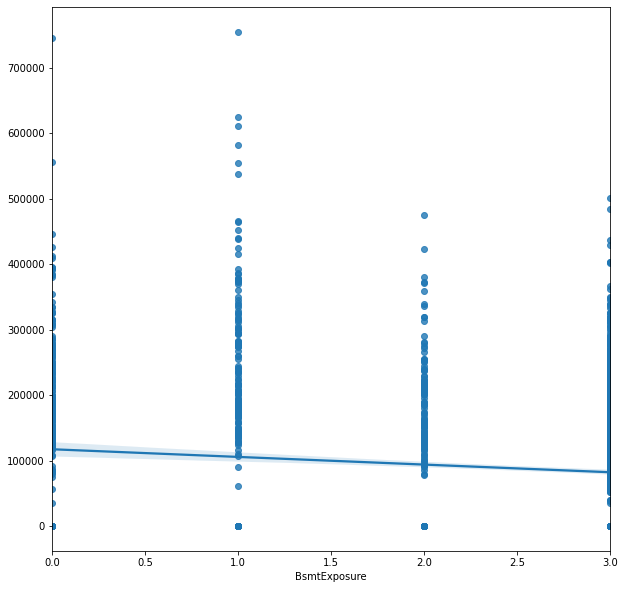

BsmtFinType1
int64


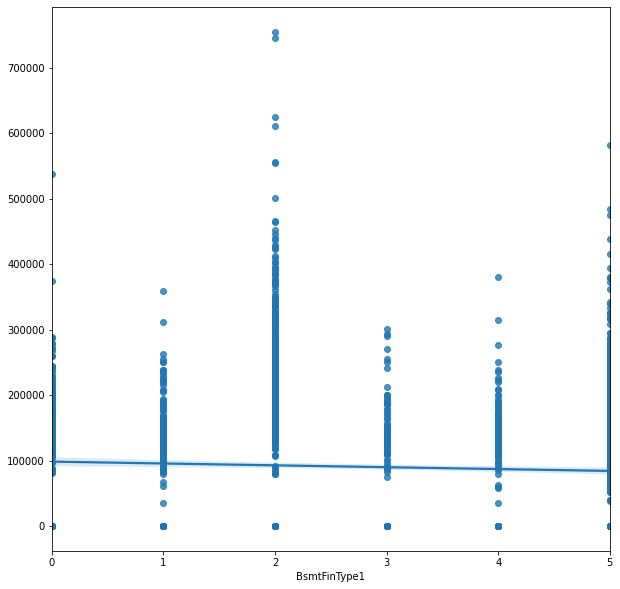

Heating
int64


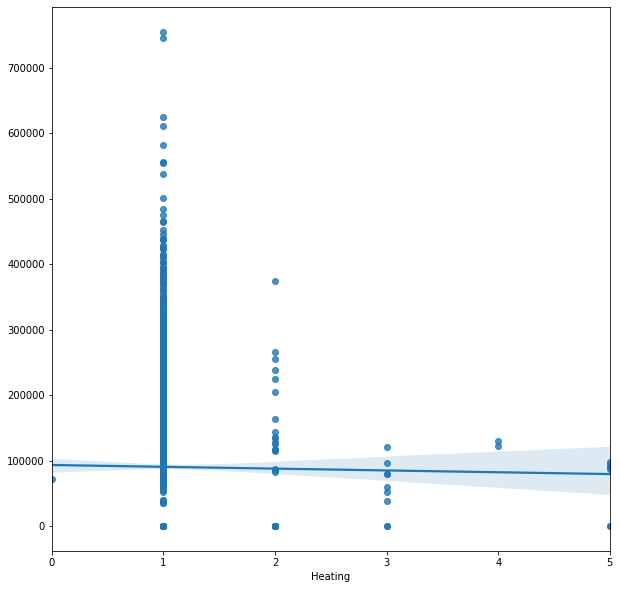

HeatingQC
int64


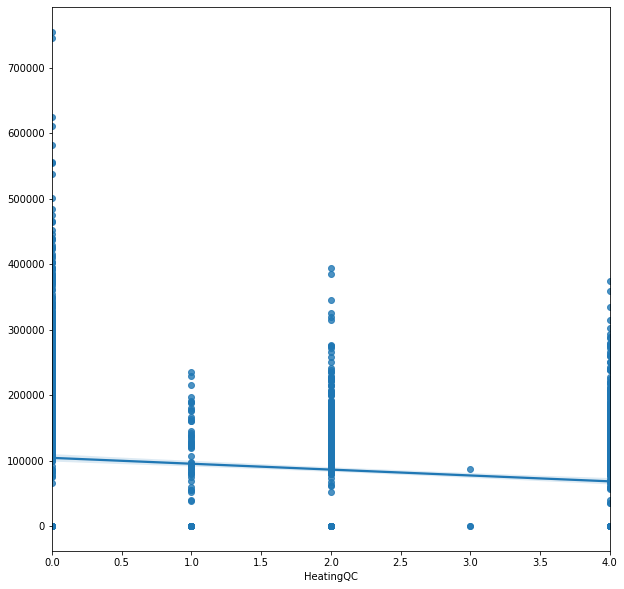

Electrical
int64


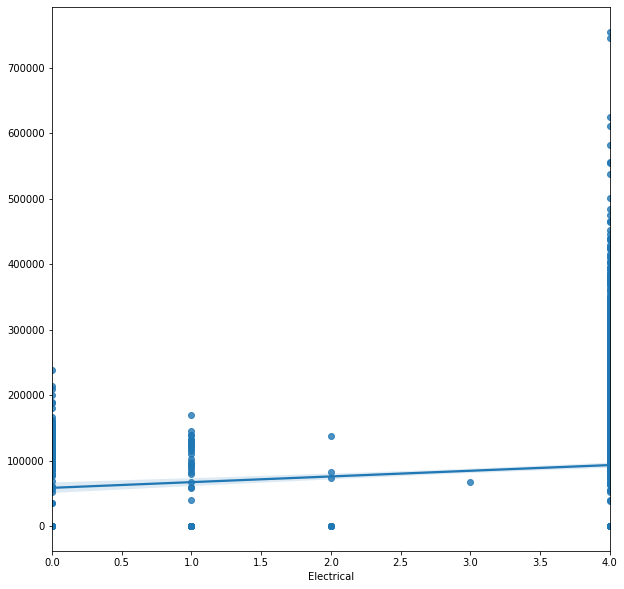

KitchenQual
int64


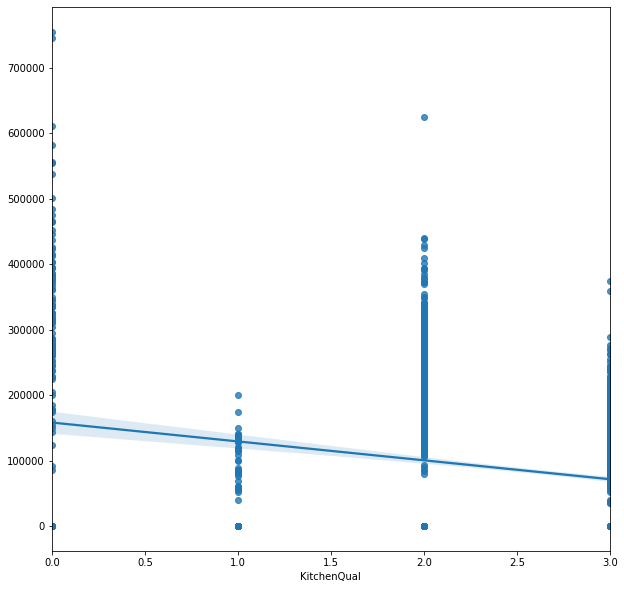

GarageType
int64


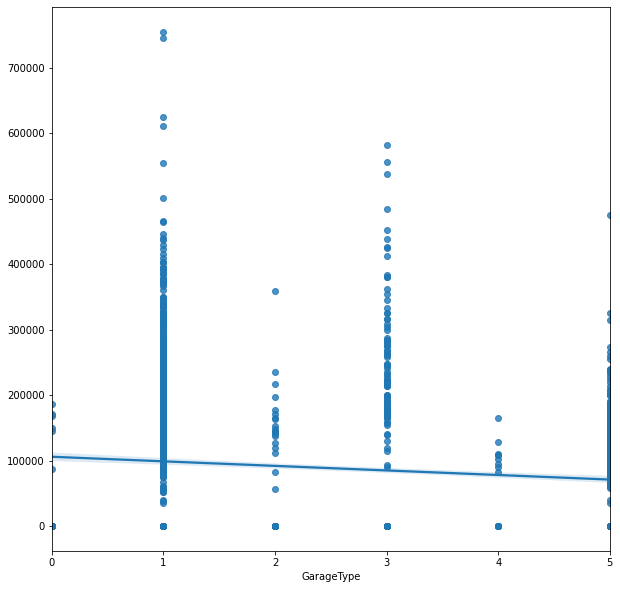

GarageFinish
int64


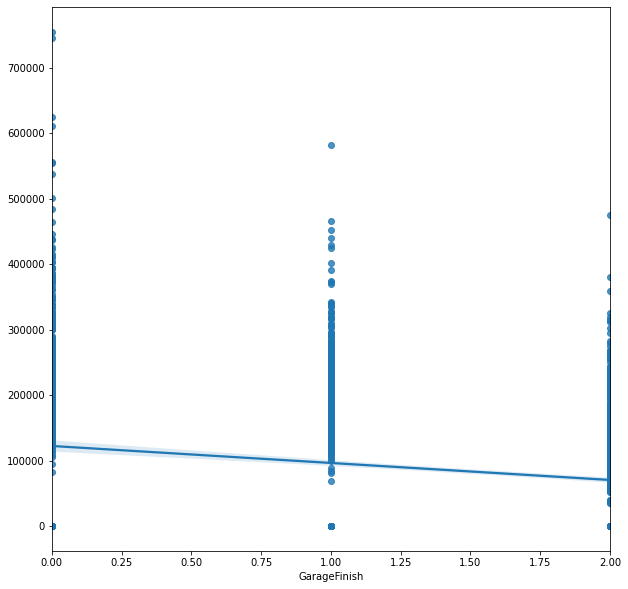

GarageQual
int64


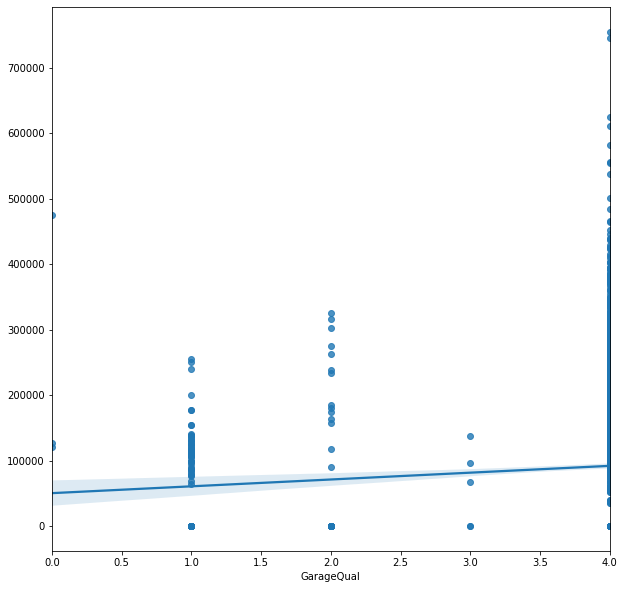

PavedDrive
int64


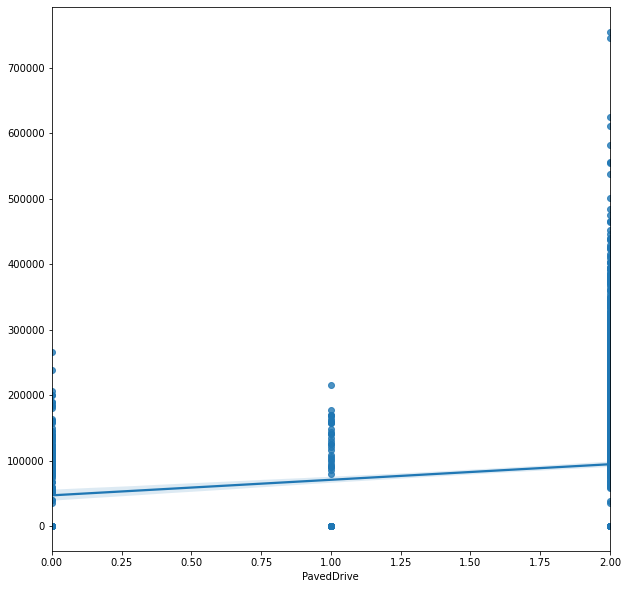

SaleType
int64


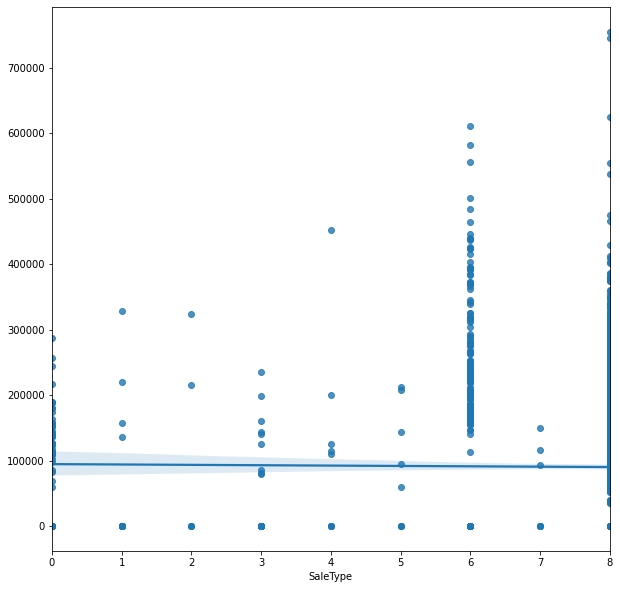

YrSold
int64


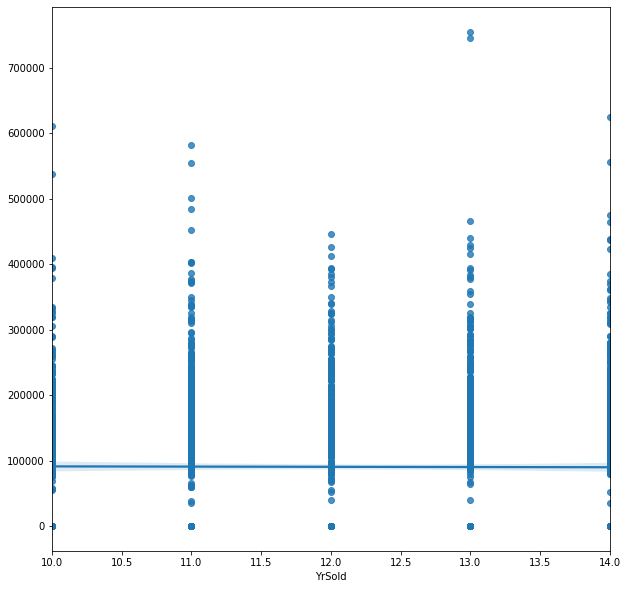

YearRemodAdd
float64


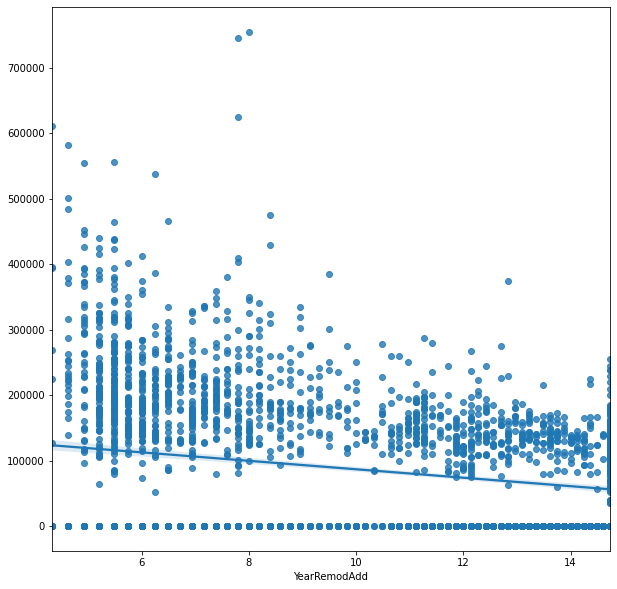

YearBuilt
float64


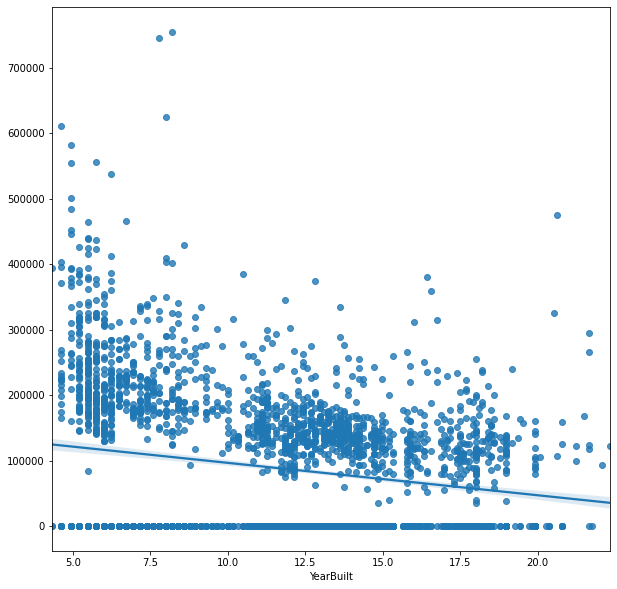

In [455]:
num_plot(data)

# Splitting training and testing data

In [456]:
data.shape

(2919, 57)

In [457]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,Heating,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,YrSold,YearRemodAdd,YearBuilt
0,1,60,65.0,8450,7,5,196.0,706.0,0.0,856.0,856,854,0,1710,1.0,0.0,2,1,1,8,0,87.509776,2.0,548.0,0,61,0,0,2,208500,3,1,3,3,0,4,5,2,0,1,2,2,2,3,2,1,0,4,2,1,1,4,2,8,12,6.246211,6.246211
1,2,20,80.0,9600,6,8,0.0,978.0,0.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,1,6,1,86.904443,2.0,460.0,298,0,0,0,5,181500,3,1,3,3,0,2,24,1,0,2,3,1,2,1,0,1,0,4,3,1,1,4,2,8,13,11.266499,11.266499
2,3,60,68.0,11250,7,5,162.0,486.0,0.0,920.0,920,866,0,1786,1.0,0.0,2,1,1,6,1,87.465077,2.0,608.0,0,42,0,0,9,223500,3,1,0,3,0,4,5,2,0,1,2,2,2,2,2,1,0,4,2,1,1,4,2,8,12,6.485281,6.717798
3,4,70,60.0,9550,7,5,0.0,216.0,0.0,756.0,961,756,0,1717,1.0,0.0,1,0,1,7,1,87.397987,3.0,642.0,0,35,272,0,2,140000,3,1,0,3,0,0,6,2,0,2,3,0,3,3,0,1,2,4,2,5,2,4,2,8,14,12.142136,18.493902
4,5,60,84.0,14260,8,5,350.0,655.0,0.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,1,9,1,87.442719,3.0,836.0,192,84,0,0,12,250000,3,1,0,3,0,2,15,2,0,1,2,2,2,0,2,1,0,4,2,1,1,4,2,8,12,6.944272,6.944272


In [0]:
from IPython.display import display
pd.options.display.max_columns = None

In [459]:
#separating prediction column
price = data['SalePrice']
price.head()
# droping it from the restof dataframe
data = data.drop(['SalePrice'], axis=1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,Heating,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,YrSold,YearRemodAdd,YearBuilt
0,1,60,65.0,8450,7,5,196.0,706.0,0.0,856.0,856,854,0,1710,1.0,0.0,2,1,1,8,0,87.509776,2.0,548.0,0,61,0,0,2,3,1,3,3,0,4,5,2,0,1,2,2,2,3,2,1,0,4,2,1,1,4,2,8,12,6.246211,6.246211
1,2,20,80.0,9600,6,8,0.0,978.0,0.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,1,6,1,86.904443,2.0,460.0,298,0,0,0,5,3,1,3,3,0,2,24,1,0,2,3,1,2,1,0,1,0,4,3,1,1,4,2,8,13,11.266499,11.266499
2,3,60,68.0,11250,7,5,162.0,486.0,0.0,920.0,920,866,0,1786,1.0,0.0,2,1,1,6,1,87.465077,2.0,608.0,0,42,0,0,9,3,1,0,3,0,4,5,2,0,1,2,2,2,2,2,1,0,4,2,1,1,4,2,8,12,6.485281,6.717798
3,4,70,60.0,9550,7,5,0.0,216.0,0.0,756.0,961,756,0,1717,1.0,0.0,1,0,1,7,1,87.397987,3.0,642.0,0,35,272,0,2,3,1,0,3,0,0,6,2,0,2,3,0,3,3,0,1,2,4,2,5,2,4,2,8,14,12.142136,18.493902
4,5,60,84.0,14260,8,5,350.0,655.0,0.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,1,9,1,87.442719,3.0,836.0,192,84,0,0,12,3,1,0,3,0,2,15,2,0,1,2,2,2,0,2,1,0,4,2,1,1,4,2,8,12,6.944272,6.944272


In [460]:
data.shape

(2919, 56)

# Feature Scaling

In [461]:
# make the dataframe an array
data_array=np.asarray(data)
print(data.shape)
# scale the features
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_array)
# creating the test set
train = data_scaled[0:1460,1:]
test = data_scaled[1460:,1:]
print("The shape of train and test set is: ", train.shape, "and", test.shape)
#numpy array for prediction varibale and splitting it into train and dummy (0 test)
price_array = np.asarray(price)
print(price.shape) #sanity check
price_train = price_array[0:1460]
print("The shape of price test array is: ", price_train.shape)

(2919, 56)
The shape of train and test set is:  (1460, 55) and (1459, 55)
(2919,)
The shape of price test array is:  (1460,)


# Modeling

Training

# Linear Regression

The mean-square-error and score with simplest linear regression is:  [1034702136.7265564, 1063953733.0828141, 997744427.0615796, 1018616723.1194075, 1009118291.9646337, 684507732.5817202] and [0.8347135680341735, 0.8323472846368953, 0.8482696025576959, 0.8481457446147815, 0.8483501840630912, 0.900488967084417]


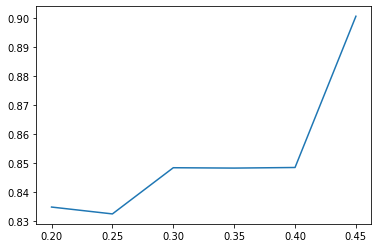

In [462]:
from sklearn.model_selection import train_test_split 
mean_se = []
sc_l = []
t_size = [0.20,0.25,0.30,0.35, 0.40, 0.45]
for i in range(len(t_size)): 
  x_train, x_cv, y_train, y_val = train_test_split(train, price_train, test_size=t_size[i], random_state=5)
  from sklearn import linear_model
  regr = linear_model.LinearRegression()
  regr.fit (x_train, y_train)
  yhat = (regr.predict(x_train))
  mse = np.mean((yhat- y_train)**2)
  sc = regr.score(x_train, y_train)
  mean_se.append(mse)
  sc_l.append(sc)

print("The mean-square-error and score with simplest linear regression is: ", mean_se, "and", sc_l)

plt.plot(t_size, sc_l)

The mean-square-error and score with simplest linear regression is:  [684507732.5817202, 972016665.9742796, 1307131628.7915518, 985031958.4481902, 1080951032.6249642, 1009035527.7551944, 850988034.0808258] and [0.900488967084417, 0.8465448816188099, 0.8175720934570867, 0.8477709333445999, 0.8325302410159855, 0.8416501666265573, 0.8625475065053168]


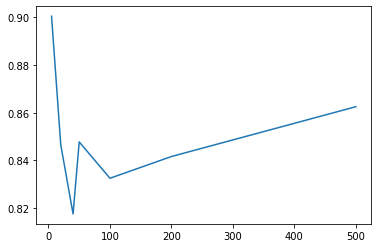

In [463]:
from sklearn.model_selection import train_test_split 
mean_se = []
sc_l = []
ran_s = [5,20,40,50,100,200, 500]
for i in range(len(ran_s)): 
  x_train, x_cv, y_train, y_val = train_test_split(train, price_train, test_size=0.45, random_state=ran_s[i])
  from sklearn import linear_model
  regr = linear_model.LinearRegression()
  regr.fit (x_train, y_train)
  yhat = (regr.predict(x_train))
  mse = np.mean((yhat- y_train)**2)
  sc = regr.score(x_train, y_train)
  mean_se.append(mse)
  sc_l.append(sc)

print("The mean-square-error and score with simplest linear regression is: ", mean_se, "and", sc_l)

plt.plot(ran_s, sc_l)

Text(0.5, 1.0, 'Train::Reg. plot')

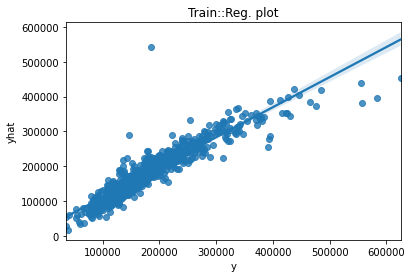

In [464]:
sns.regplot(y_train, yhat,'ro')
plt.xlabel("y")
plt.ylabel("yhat")
plt.title("Train::Reg. plot")

In [465]:
print("The best test size and random state is: 0.45 and 5")

The best test size and random state is: 0.45 and 5


# Rridge Regression

[0.8625399908881832, 0.8625522067313027, 0.8625522067309357, 0.8625522066942277, 0.862552203027812, 0.862551840698272, 0.8625193671143492, 0.8608627257117263, 0.8311833798253255]


Text(0.5, 1.0, 'Train:Ridge. plot')

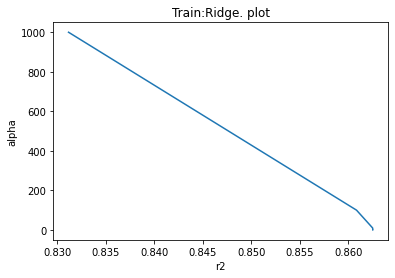

In [466]:
# code for ridge regression
scr = []
alpha = [0,0.0001,0.001,0.01,0.1,1,10,100,1000]
count = 0
for al in alpha:
    from sklearn.linear_model import Ridge
    rr = Ridge(al)
    rr.fit(x_train, y_train)
    Rd_sc = rr.score(x_train,y_train)
    scr.append(Rd_sc)
    count = count+1

    
print(scr)
plt.plot(np.asarray(scr),np.asarray(alpha))
plt.xlabel("r2")
plt.ylabel("alpha")
plt.title("Train:Ridge. plot")

# Lasso Regression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341660012125.9221, tolerance: 497148777.72903794
  positive)


[0.8625522067313065, 0.8625522067313064, 0.8625522067312944, 0.8625522067301284, 0.8625522066156803, 0.8625521948332092, 0.8625509803086567, 0.8624393170241482, 0.8586085726618371]


Text(0.5, 1.0, 'Train:Lasso. plot')

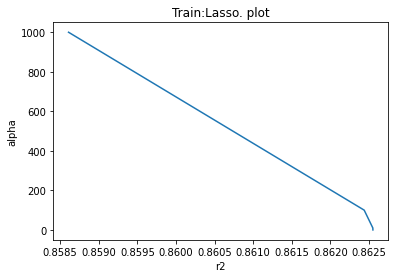

In [467]:
scre = []
alfa = [0,0.0001,0.001,0.01,0.1,1,10,100,1000]
count = 0
for al in alfa:
  from sklearn.linear_model import Lasso
  lasso1 = Lasso(alpha=al, max_iter=1000000)
  lasso1.fit(x_train, y_train)
  train_score=lasso1.score(x_train, y_train)
  scre.append(train_score)


print(scre)
plt.plot(np.asarray(scre),np.asarray(alfa))
plt.xlabel("r2")
plt.ylabel("alpha")
plt.title("Train:Lasso. plot")


#Libraries for Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNetCV, LassoCV, RidgeCV
import lightgbm as lgbm
import xgboost as xgb
import catboost as cat
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

# XGB

In [469]:
%%time
xgb_reg = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1, booster='gbtree', random_state=42)
xgb_param_grid = {"learning_rate":[0.1, 0.01, 0.001],"max_depth":[2, 3, 4, 5]}
                  
grid_search = GridSearchCV(xgb_reg, param_grid=xgb_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

xgb_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = xgb_reg.predict(x_train)

print('-' * 10 + 'XGB' + '-' * 10)
print('R square Accuracy: ', r2_score(y_train, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


[02:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.01, 'max_depth': 4}
----------XGB----------
R square Accuracy:  0.9851289834764472
Mean Absolute Error:  7086.207400957347
Mean Squared Error:  92068588.89505109
CPU times: user 3.37 s, sys: 1.48 s, total: 4.86 s
Wall time: 1min 10s


# Cat_Boost

In [470]:
%%time
cat_reg = cat.CatBoostRegressor(learning_rate=0.01, n_estimators=1000, objective='RMSE', loss_function='R2', random_state=42)
cat_param_grid = {"learning_rate":[0.1, 0.01, 0.001],"max_depth":[2, 3, 4, 5]}
                  
grid_search = GridSearchCV(cat_reg, param_grid=cat_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

cat_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = cat_reg.predict(x_train)

print('-' * 10 + 'CatBoost' + '-' * 10)
print('R square Accuracy: ', r2_score(y_train, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min


0:	learn: 78185.3192789	total: 5.06ms	remaining: 5.05s
1:	learn: 77697.7261677	total: 8.35ms	remaining: 4.17s
2:	learn: 77210.6464756	total: 11.4ms	remaining: 3.78s
3:	learn: 76725.7514529	total: 14.2ms	remaining: 3.54s
4:	learn: 76244.7803780	total: 17.2ms	remaining: 3.42s
5:	learn: 75779.5245077	total: 20.1ms	remaining: 3.33s
6:	learn: 75305.4004537	total: 23.1ms	remaining: 3.27s
7:	learn: 74837.0890888	total: 26.1ms	remaining: 3.24s
8:	learn: 74390.4239327	total: 28.9ms	remaining: 3.19s
9:	learn: 73911.3833739	total: 31.8ms	remaining: 3.15s
10:	learn: 73483.8187576	total: 34.9ms	remaining: 3.14s
11:	learn: 73043.8204928	total: 38ms	remaining: 3.13s
12:	learn: 72612.6086981	total: 41ms	remaining: 3.11s
13:	learn: 72164.9208640	total: 43.8ms	remaining: 3.08s
14:	learn: 71744.1351165	total: 46.7ms	remaining: 3.07s
15:	learn: 71301.5852941	total: 49.7ms	remaining: 3.05s
16:	learn: 70894.9150446	total: 52.5ms	remaining: 3.04s
17:	learn: 70497.4607226	total: 55.6ms	remaining: 3.03s
18:	le

# Gradient Boost

In [477]:
%%time
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
gbdt_param_grid = {"learning_rate":[0.1, 0.01, 0.001],"max_depth":[2, 3, 4, 5]}

                  
grid_search = GridSearchCV(gb_reg, param_grid=gbdt_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

gb_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = gb_reg.predict(x_train)

print('-' * 10 + 'GBM' + '-' * 10)
print('R square Accuracy: ', r2_score(y_train, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.7min finished


{'learning_rate': 0.01, 'max_depth': 3}
----------GBM----------
R square Accuracy:  0.9750952698518602
Mean Absolute Error:  9522.439100483522
Mean Squared Error:  171312465.20900312
CPU times: user 4.11 s, sys: 16.9 ms, total: 4.13 s
Wall time: 2min 43s


# Ridge_CV

In [472]:
alphas = [1e-9,1e-6,1e-3,1e-1,1,100,1000]

ridgecv_reg = make_pipeline(RidgeCV(alphas=alphas))
ridgecv_reg.fit(x_train, y_train)
y_pred = ridgecv_reg.predict(x_train)

print('-' * 10 + 'RidgeCV' + '-' * 10)
print('R square Accuracy: ', r2_score(y_train,y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_train,y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))

----------RidgeCV----------
R square Accuracy:  0.8608627257117277
Mean Absolute Error:  18237.72743360623
Mean Squared Error:  861418752.7890964


# Lasso CV

In [473]:
lassocv_reg = make_pipeline(LassoCV(alphas=alphas))
lassocv_reg.fit(x_train, y_train)
y_pred = lassocv_reg.predict(x_train)

print('-' * 10 + 'LassoCV' + '-' * 10)
print('R square Accuracy: ', r2_score(y_train, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40604739940.3775, tolerance: 355710140.6464812
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41323692489.72302, tolerance: 355710140.6464812
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653964423.206665, tolerance: 403033023.8044288
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase

----------LassoCV----------
R square Accuracy:  0.8586085726618371
Mean Absolute Error:  18158.413742662062
Mean Squared Error:  875374536.5196983


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52990580399.84479, tolerance: 414981580.93224174
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151050606451.67108, tolerance: 414981580.93224174
  tol, rng, random, positive)


# First Final Model

In [474]:
x_train, x_cv, y_train, y_val = train_test_split(train, price_train, test_size=0.45, random_state=5)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
yhat = (regr.predict(x_train))
mse = np.mean((yhat- y_train)**2)
sc = regr.score(x_train, y_train)
print(mse, sc)

684507732.5817202 0.900488967084417


# Prediction

In [493]:
x_te = test
yhat_xgb = xgb_reg.predict(x_te)
yhat_slr = (regr.predict(x_te))
yhat_rr = (rr.predict(x_te))
yhat_lasso = (lasso1.predict(x_te))
yhat_cat = cat_reg.predict(x_te)
yhat_lassoCV = lassocv_reg.predict(x_train)
yhat_gb = gb_reg.predict(x_train)
yhat_rcv = ridgecv_reg.predict(x_train)

#submission pred
yhat_test = yhat_xgb
Ind = (data_array[1460:,0])
Ind.shape
yhat_test.shape
dataset = pd.DataFrame({'Id': Ind[:] ,'SalePrice': yhat_test[:]})
dataset.astype({'Id': 'int32'}).dtypes
print(dataset)
dataset.to_csv('Sub_gb.csv', index=False)

          Id      SalePrice
0     1461.0  128864.296875
1     1462.0  155469.312500
2     1463.0  177865.609375
3     1464.0  180078.828125
4     1465.0  184027.875000
...      ...            ...
1454  2915.0   83327.664062
1455  2916.0   79619.984375
1456  2917.0  164521.031250
1457  2918.0  116419.796875
1458  2919.0  219174.218750

[1459 rows x 2 columns]


In [0]:
dataset.info()